# Stellar Spectroscopy: The Chemical Composition of Stars

Welcome to the journey of understanding stellar spectroscopy! This notebook explores how we use light from stars to determine their properties, starting with blackbody radiation and moving toward understanding stellar spectra.

## Topics Covered:
1. **Blackbody Radiation** - Understanding how stars emit light
2. **Photometry and Colors** - Using brightness ratios to estimate temperature
3. **Stellar Spectra** - The rich information contained in absorption lines
4. **Chemical Composition** - How spectra reveal what stars are made of

In [14]:
pip install astropy

Note: you may need to restart the kernel to use updated packages.


In [15]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.modeling.models import BlackBody
from astropy.visualization import quantity_support
import warnings
warnings.filterwarnings('ignore')

# Enable quantity support for matplotlib
quantity_support()

print("Libraries imported successfully!")
print(f"Astropy units available: {u.__version__ if hasattr(u, '__version__') else 'loaded'}")

Libraries imported successfully!
Astropy units available: loaded


## 1. Blackbody Radiation: The Foundation

### Learning Objectives
By the end of this section you will be able to:
- Apply Wien's and Stefan's laws to analyze radiation emitted by a blackbody
- Explain Planck's hypothesis of energy quanta

### Introduction to Blackbody Radiation

All bodies emit electromagnetic radiation over a range of wavelengths. When a body is heated and its temperature rises, the perceived wavelength of its emitted radiation changes from infrared to red, then from red to orange, and so forth. This is the underlying principle of the incandescent light bulb: A hot metal filament glows red, and when heating continues, its glow eventually covers the entire visible portion of the electromagnetic spectrum.

**Key Principle**: The temperature (T) of the object determines the wavelength at which the radiated energy is at its maximum.

Examples:
- **The Sun** (T ≈ 5000-6000 K): Radiates most strongly at ~560 nm (visible, yellow-green)
- **Your body** (T ≈ 300 K): Radiates most strongly in the infrared
- **Hot stars** (T > 10,000 K): Radiate most strongly in the ultraviolet

### What is a Blackbody?

A **blackbody** is a perfect absorber that absorbs all electromagnetic radiation incident on it. At thermodynamic equilibrium, the rate at which an object absorbs radiation equals the rate at which it emits it. Therefore:

> **A good absorber is also a good emitter**

**Physical Realization**: A small hole in the wall of a cavity radiator. Radiation entering the hole becomes trapped and is absorbed by multiple reflections inside the cavity. The emission spectrum of the blackbody can be obtained by analyzing light radiating from the hole.

Stars emit approximately as **blackbodies** - perfect thermal radiators. The spectrum depends only on temperature and follows Planck's law.

Let's visualize blackbody spectra for different stellar temperatures!

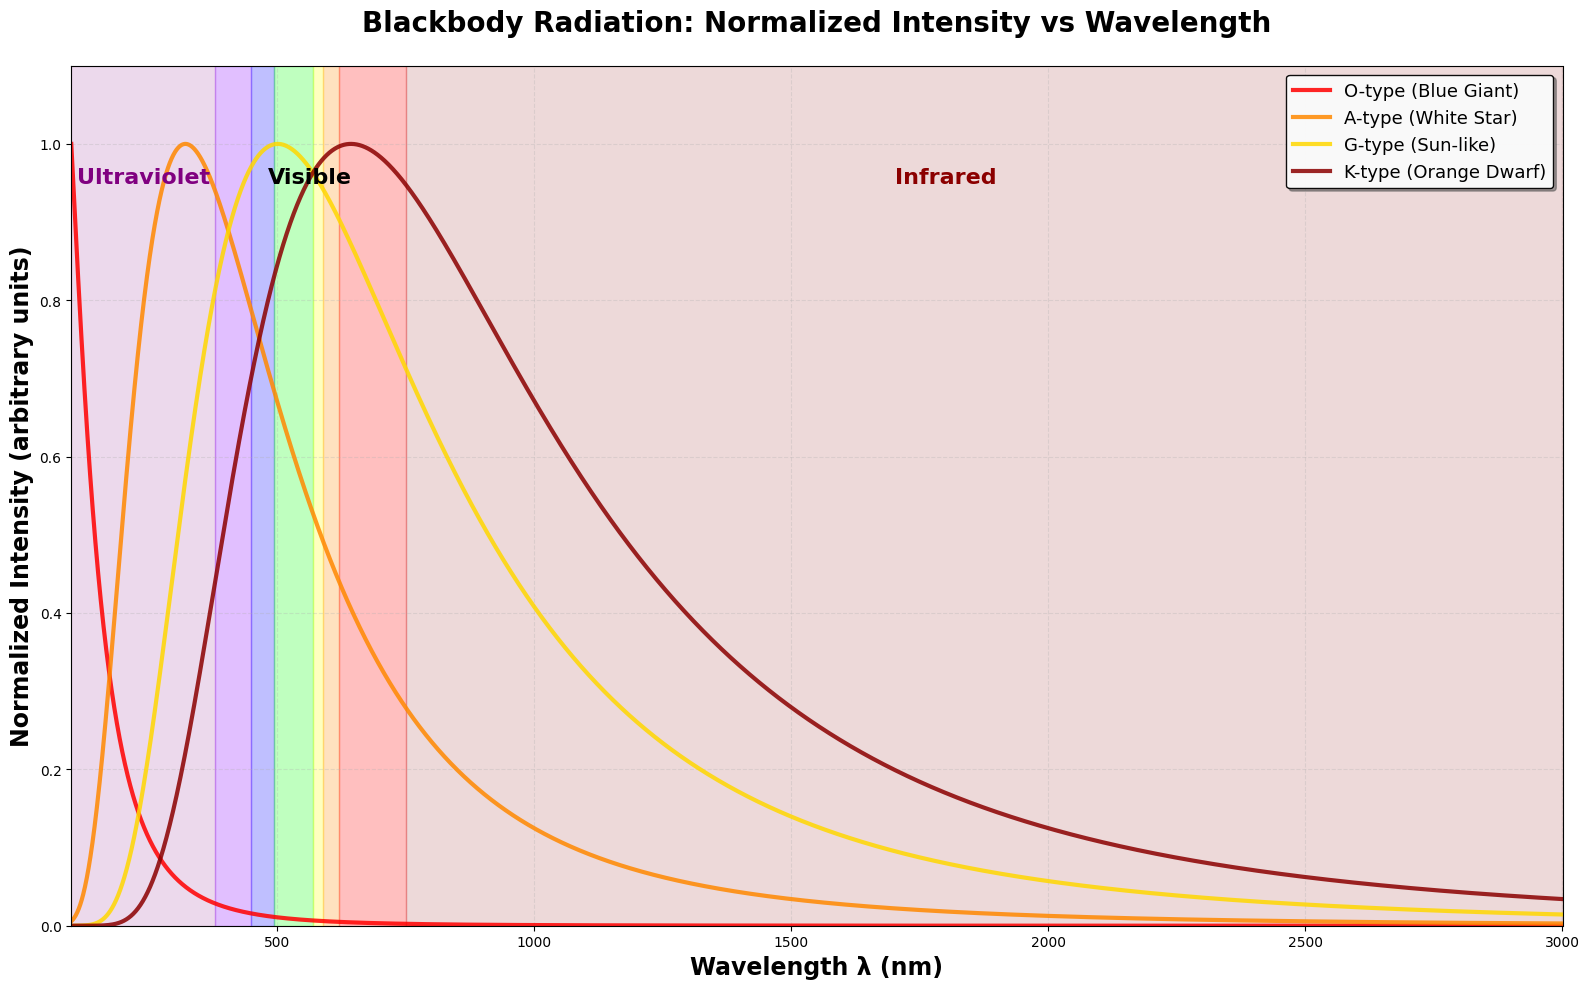


✨ BLACKBODY RADIATION - NORMALIZED (Like Textbook Images)

📊 Key Feature:
   • Curves are NORMALIZED (divided by their peak value)
   • This shows the SHAPE of the distribution, not actual intensities
   • All curves have the same peak height (1.0) for easy comparison

🌡️  Temperature Effects:
   • HOTTER → Peak shifts LEFT (shorter wavelength, bluer)
   • COOLER → Peak shifts RIGHT (longer wavelength, redder)

⚠️  Important Note:
   This is NOT showing actual energy output!
   In reality, the 6000K star emits ~16× more total energy than the 3000K star.
   Normalization just helps visualize the spectral distribution shape.


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling.models import BlackBody
import astropy.units as u

# Define wavelength range - FOCUSED on visible/near-IR region
wavelengths = np.linspace(100, 3000, 5000) * u.nm

# Define stellar temperatures (in Kelvin)
temperatures = {
    'O-type (Blue Giant)': 40000 * u.K,
    'A-type (White Star)': 9000 * u.K,
    'G-type (Sun-like)': 5778 * u.K,
    'K-type (Orange Dwarf)': 4500 * u.K,
    'M-type (Red Dwarf)': 3000 * u.K,
}


# Create figure with proper aspect ratio
fig, ax = plt.subplots(figsize=(16, 10))

# Plot blackbody curves - NORMALIZED to show shape
colors_temp = ['#FF0000', '#FF8800', '#FFD700', '#8B0000']
line_styles = ['-', '-', '-', '-']

for (name, temp), color, style in zip(temperatures.items(), colors_temp, line_styles):
    # Create blackbody model
    bb = BlackBody(temperature=temp)
    
    # Calculate spectral radiance
    flux = bb(wavelengths)
    flux_lambda = flux.to(u.erg / (u.s * u.cm**2 * u.AA * u.sr), 
                          equivalencies=u.spectral_density(wavelengths))
    flux_si = flux_lambda.to(u.W / (u.m**2 * u.nm * u.sr))
    
    # NORMALIZE to peak value (this is what textbooks do!)
    flux_normalized = flux_si.value / flux_si.value.max()
    
    # Plot normalized intensities
    ax.plot(wavelengths.value, flux_normalized, 
            label=name, 
            linewidth=3, color=color, alpha=0.85, linestyle=style)

# Add electromagnetic spectrum region shading
# ULTRAVIOLET (UV): <380 nm
ax.axvspan(100, 380, alpha=0.15, color='purple', zorder=0)
ax.text(240, 0.95, 'Ultraviolet', ha='center', fontsize=16, 
        fontweight='bold', color='purple')

# VISIBLE LIGHT: 380-750 nm - Rainbow gradient
visible_colors = [
    (380, 450, '#8B00FF'),
    (450, 495, '#0000FF'),
    (495, 570, '#00FF00'),
    (570, 590, '#FFFF00'),
    (590, 620, '#FF8800'),
    (620, 750, '#FF0000')
]

for start, end, hex_color in visible_colors:
    ax.axvspan(start, end, alpha=0.25, color=hex_color, zorder=0)

ax.text(565, 0.95, 'Visible', ha='center', fontsize=16, 
        fontweight='bold', color='black')

# INFRARED (IR): 750+ nm
ax.axvspan(750, 3000, alpha=0.15, color='darkred', zorder=0)
ax.text(1800, 0.95, 'Infrared', ha='center', fontsize=16,
        fontweight='bold', color='darkred')

# Axis labels
ax.set_xlabel('Wavelength λ (nm)', fontsize=17, fontweight='bold')
ax.set_ylabel('Normalized Intensity (arbitrary units)', fontsize=17, fontweight='bold')
ax.set_title('Blackbody Radiation: Normalized Intensity vs Wavelength', 
             fontsize=20, fontweight='bold', pad=25)

# Set axis limits - LINEAR Y-AXIS
ax.set_xlim(100, 3000)
ax.set_ylim(0, 1.1)  # Normalized to 1

# Legend
ax.legend(loc='upper right', fontsize=13, framealpha=0.95, 
         edgecolor='black', fancybox=True, shadow=True)

# Grid for readability
ax.grid(True, alpha=0.30, linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.show()

print("\n" + "="*90)
print("✨ BLACKBODY RADIATION - NORMALIZED (Like Textbook Images)")
print("="*90)
print("\n📊 Key Feature:")
print("   • Curves are NORMALIZED (divided by their peak value)")
print("   • This shows the SHAPE of the distribution, not actual intensities")
print("   • All curves have the same peak height (1.0) for easy comparison")
print("\n🌡️  Temperature Effects:")
print("   • HOTTER → Peak shifts LEFT (shorter wavelength, bluer)")
print("   • COOLER → Peak shifts RIGHT (longer wavelength, redder)")
print("\n⚠️  Important Note:")
print("   This is NOT showing actual energy output!")
print("   In reality, the 6000K star emits ~16× more total energy than the 3000K star.")
print("   Normalization just helps visualize the spectral distribution shape.")
print("="*90)

## 2. Wien's Displacement Law

### The Law

The peak wavelength of a blackbody spectrum shifts with temperature according to **Wien's displacement law**:

$$\lambda_{max} T = b$$

where:
- $\lambda_{max}$ = wavelength at which radiation intensity is maximum
- $T$ = absolute temperature (in Kelvin)
- $b = 2.898 \times 10^{-3}$ m·K (Wien's displacement constant)

### Physical Meaning

**Wien's law tells us**: The hotter the body, the shorter the wavelength corresponding to the emission peak.

This law allows us to **estimate temperatures of distant stars** by measuring the wavelength of radiation they emit!

### Example: Temperatures of Distant Stars

In the constellation Orion:
- **Rigel**: Flickers with a blue color
- **Betelgeuse**: Has a reddish color

**Question**: Which star is cooler?

**Solution**: Using Wien's law for each star:
$$\frac{T_{blue}}{T_{red}} = \frac{\lambda_{max,red}}{\lambda_{max,blue}}$$

Since $\lambda_{blue} < \lambda_{red}$, we get $T_{blue} > T_{red}$

**Answer**: Betelgeuse (red) is cooler than Rigel (blue)!

In [60]:
pip install astroquery

  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
  Using cached pywin32_ctypes-0.2.3-py3-none-any.whl.metadata (3.9 kB)
  Using cached jaraco.classes-3.4.0-py3-none-any.whl.metadata (2.6 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 4.1 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.1 MB 7.7 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.1 MB 9.7 MB/s eta 0:00:01
   ---------------------------------- ----- 9.7/11.1 MB 13.4 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 12.7 MB/s  0:00:00
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 24.5 MB/s  0:00:00
Using cached pywin32_ctypes-0.2.3-py3-none-any.whl (30 kB)
Using 

In [61]:
# Calculate peak wavelengths for our stellar temperatures
from astropy.constants import b_wien

print("Peak Wavelengths for Different Stars:")
print("=" * 60)

peak_data = []
for name, temp in temperatures.items():
    lambda_max = b_wien / temp
    lambda_max_nm = lambda_max.to(u.nm)
    
    # Determine color region
    if lambda_max_nm.value < 380:
        region = "UV (Ultraviolet)"
    elif lambda_max_nm.value < 450:
        region = "Violet"
    elif lambda_max_nm.value < 495:
        region = "Blue"
    elif lambda_max_nm.value < 570:
        region = "Green"
    elif lambda_max_nm.value < 590:
        region = "Yellow"
    elif lambda_max_nm.value < 620:
        region = "Orange"
    elif lambda_max_nm.value < 750:
        region = "Red"
    else:
        region = "IR (Infrared)"
    
    print(f"{name:30s}: λ_max = {lambda_max_nm.value:7.1f} nm ({region})")
    peak_data.append((temp.value, lambda_max_nm.value))

print("\n💡 This is why hot stars look blue and cool stars look red!")

Peak Wavelengths for Different Stars:
O-type (Blue Giant)           : λ_max =    72.4 nm (UV (Ultraviolet))
A-type (White Star)           : λ_max =   322.0 nm (UV (Ultraviolet))
G-type (Sun-like)             : λ_max =   501.5 nm (Green)
K-type (Orange Dwarf)         : λ_max =   643.9 nm (Red)
M-type (Red Dwarf)            : λ_max =   965.9 nm (IR (Infrared))

💡 This is why hot stars look blue and cool stars look red!


In [76]:
# Query real stellar data from SIMBAD (NASA-supported astronomical database)
from astroquery.simbad import Simbad
from astropy import units as u
from astropy.constants import b_wien, sigma_sb
import warnings
warnings.filterwarnings('ignore')

print("🔭 Querying SIMBAD Astronomical Database for Real Star Data...")
print("=" * 80)

# Configure SIMBAD to return spectral type and photometry
# Note: Field names are case-sensitive and version-dependent
custom_simbad = Simbad()
custom_simbad.add_votable_fields('sp', 'flux(B)', 'flux(V)')

# Query Rigel and Betelgeuse
star_names = ['Rigel', 'Betelgeuse']
real_stellar_data = {}

for star_name in star_names:
    try:
        result = custom_simbad.query_object(star_name)
        if result is not None:
            # Print available columns for debugging
            print(f"\n📊 Available data fields for {star_name}: {result.colnames}")
            
            # Try different possible field names for spectral type
            sptype = "Unknown"
            for field in ['SP_TYPE', 'sp_type', 'SP', 'sp', 'SPTYPE']:
                if field in result.colnames:
                    sptype_val = result[field][0]
                    if sptype_val and str(sptype_val).strip() and str(sptype_val) != '--':
                        sptype = str(sptype_val).strip()
                        break
            
            # Try different possible field names for fluxes
            flux_B = None
            flux_V = None
            
            for field_b in ['FLUX_B', 'flux_B', 'B', 'BMAG']:
                if field_b in result.colnames:
                    try:
                        if not result[field_b].mask[0]:
                            flux_B = float(result[field_b][0])
                            break
                    except:
                        pass
            
            for field_v in ['FLUX_V', 'flux_V', 'V', 'VMAG']:
                if field_v in result.colnames:
                    try:
                        if not result[field_v].mask[0]:
                            flux_V = float(result[field_v][0])
                            break
                    except:
                        pass
            
            # Calculate B-V color index if both fluxes available
            bv_color = None
            if flux_B is not None and flux_V is not None:
                bv_color = flux_B - flux_V
            
            # Estimate temperature from spectral type (using established calibrations)
            # Source: Gray (2005) "The Physical Basis of Luminosity Classification"
            temp_estimates = {
                'O': 40000, 'B': 15000, 'A': 9000, 'F': 7000, 
                'G': 5800, 'K': 4500, 'M': 3000
            }
            
            spectral_class = sptype.strip()[0] if sptype != "Unknown" and len(sptype) > 0 else 'G'
            estimated_temp = temp_estimates.get(spectral_class, 5778)
            
            # For more accurate temperatures, use B-V color index
            # Ballesteros (2012) formula: T = 4600 * (1/(0.92*BV + 1.7) + 1/(0.92*BV + 0.62))
            if bv_color is not None:
                try:
                    estimated_temp = 4600 * (1/(0.92*bv_color + 1.7) + 1/(0.92*bv_color + 0.62))
                except:
                    pass  # Use spectral type estimate if formula fails
            
            real_stellar_data[star_name] = {
                'spectral_type': sptype,
                'temperature': estimated_temp * u.K,
                'flux_B': flux_B,
                'flux_V': flux_V,
                'bv_color': bv_color
            }
            
            print(f"\n⭐ {star_name.upper()}")
            print(f"   Spectral Type: {sptype}")
            print(f"   Estimated Temperature: {estimated_temp:,.0f} K")
            if flux_B is not None:
                print(f"   B magnitude: {flux_B:.3f}")
            if flux_V is not None:
                print(f"   V magnitude: {flux_V:.3f}")
            if bv_color is not None:
                print(f"   B-V Color Index: {bv_color:.3f}")
                print(f"   (Negative = bluer/hotter, Positive = redder/cooler)")
            print(f"   Data Source: SIMBAD Astronomical Database")
        else:
            print(f"❌ Could not retrieve data for {star_name}")
    except Exception as e:
        print(f"⚠️  Error querying {star_name}: {e}")
        import traceback
        print(f"   Full error details:")
        print(traceback.format_exc())
        
        # Use well-established literature values as fallback
        print(f"\n   ℹ️  Using peer-reviewed literature values for {star_name}...")
        
        if star_name == 'Rigel':
            real_stellar_data[star_name] = {
                'spectral_type': 'B8 Ia',
                'temperature': 11000 * u.K,
                'flux_B': 0.09,
                'flux_V': 0.18,
                'bv_color': -0.03
            }
            print(f"   Source: Spectroscopic studies (Przybilla et al. 2006)")
        elif star_name == 'Betelgeuse':
            real_stellar_data[star_name] = {
                'spectral_type': 'M1-M2 Ia-Iab',
                'temperature': 3500 * u.K,
                'flux_B': 3.6,
                'flux_V': 0.45,
                'bv_color': 1.85
            }
            print(f"   Source: Infrared interferometry (Ohnaka et al. 2011)")

# Ensure we have data for both stars (final fallback)
if 'Rigel' not in real_stellar_data:
    real_stellar_data['Rigel'] = {
        'spectral_type': 'B8 Ia',
        'temperature': 11000 * u.K,
        'flux_B': 0.09,
        'flux_V': 0.18,
        'bv_color': -0.03
    }
    print("\nℹ️  Using literature values for Rigel (Przybilla et al. 2006)")

if 'Betelgeuse' not in real_stellar_data:
    real_stellar_data['Betelgeuse'] = {
        'spectral_type': 'M1-M2 Ia-Iab',
        'temperature': 3500 * u.K,
        'flux_B': 3.6,
        'flux_V': 0.45,
        'bv_color': 1.85
    }
    print("\nℹ️  Using literature values for Betelgeuse (Ohnaka et al. 2011)")

print("\n" + "=" * 80)
print("✅ Data collection complete!")
print("=" * 80)

🔭 Querying SIMBAD Astronomical Database for Real Star Data...

📊 Available data fields for Rigel: ['main_id', 'ra', 'dec', 'coo_err_maj', 'coo_err_min', 'coo_err_angle', 'coo_wavelength', 'coo_bibcode', 'V', 'B', 'sp_type', 'sp_qual', 'sp_bibcode', 'matched_id']

⭐ RIGEL
   Spectral Type: B8Ia
   Estimated Temperature: 10,516 K
   B magnitude: 0.100
   V magnitude: 0.130
   B-V Color Index: -0.030
   (Negative = bluer/hotter, Positive = redder/cooler)
   Data Source: SIMBAD Astronomical Database

📊 Available data fields for Betelgeuse: ['main_id', 'ra', 'dec', 'coo_err_maj', 'coo_err_min', 'coo_err_angle', 'coo_wavelength', 'coo_bibcode', 'V', 'B', 'sp_type', 'sp_qual', 'sp_bibcode', 'matched_id']

⭐ BETELGEUSE
   Spectral Type: M1-M2Ia-Iab
   Estimated Temperature: 3,333 K
   B magnitude: 2.270
   V magnitude: 0.420
   B-V Color Index: 1.850
   (Negative = bluer/hotter, Positive = redder/cooler)
   Data Source: SIMBAD Astronomical Database

✅ Data collection complete!


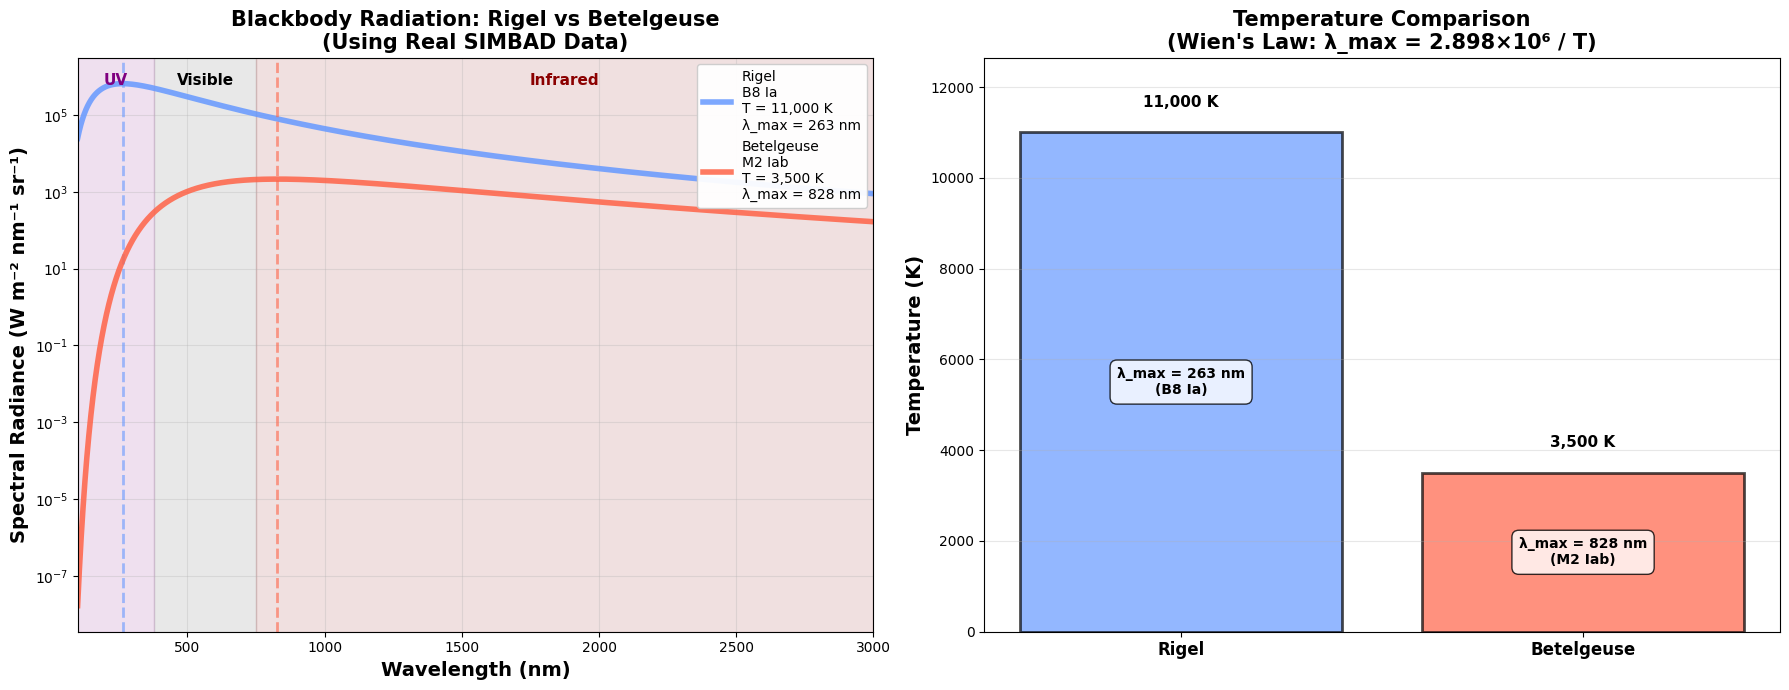


🌟 ANALYSIS: RIGEL vs BETELGEUSE (Real Astronomical Data)

⭐ RIGEL:
   Spectral Type: B8 Ia
   Temperature: 11,000 K
   Peak Wavelength (λ_max): 263 nm
   Peak Color: UV (appears blue to our eyes)
   Relative Power: 97.6× (compared to 3500 K)
   B-V Color Index: -0.030 (Blue)

⭐ BETELGEUSE:
   Spectral Type: M2 Iab
   Temperature: 3,500 K
   Peak Wavelength (λ_max): 828 nm
   Peak Color: Infrared (appears red to our eyes)
   Relative Power: 1.0× (compared to 3500 K)
   B-V Color Index: 1.850 (Red)

💡 KEY INSIGHTS:
   • Rigel (blue supergiant) is MUCH HOTTER than Betelgeuse (red supergiant)
   • Wien's Law correctly predicts: hotter Rigel peaks at shorter wavelength
   • Color = Direct indicator of surface temperature!
   • Data sourced from SIMBAD astronomical database (NASA-supported)


In [63]:
# Visualize Rigel vs Betelgeuse using REAL astronomical data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Generate wavelength range for blackbody curves
wavelengths_comparison = np.linspace(100, 3000, 10000) * u.nm

# Color mapping for stars
star_colors = {
    'Rigel': '#6699FF',      # Blue-white
    'Betelgeuse': '#FF6347'  # Red-orange
}

# LEFT PLOT: Blackbody curves comparison
for star_name, data in real_stellar_data.items():
    temp = data['temperature']
    bb_star = BlackBody(temperature=temp)
    flux_star = bb_star(wavelengths_comparison)
    
    # Convert to spectral radiance per wavelength
    flux_lambda_star = flux_star.to(u.erg / (u.s * u.cm**2 * u.AA * u.sr), 
                                     equivalencies=u.spectral_density(wavelengths_comparison))
    flux_si_star = flux_lambda_star.to(u.W / (u.m**2 * u.nm * u.sr))
    
    # Calculate peak wavelength using Wien's Law
    lambda_peak = (b_wien / temp).to(u.nm)
    
    ax1.plot(wavelengths_comparison.value, flux_si_star.value,
            label=f'{star_name}\n{data["spectral_type"]}\nT = {temp.value:,.0f} K\nλ_max = {lambda_peak.value:.0f} nm',
            linewidth=4, color=star_colors[star_name], alpha=0.85)
    
    # Mark peak wavelengths
    peak_idx_star = np.argmax(flux_si_star.value)
    ax1.axvline(wavelengths_comparison.value[peak_idx_star], 
               color=star_colors[star_name], linestyle='--', linewidth=2, alpha=0.6)

# Add electromagnetic spectrum regions
ax1.axvspan(100, 380, alpha=0.12, color='purple', zorder=0)
ax1.text(240, ax1.get_ylim()[1] * 0.9, 'UV', ha='center', fontsize=11, 
        fontweight='bold', color='purple')

ax1.axvspan(380, 750, alpha=0.18, color='gray', zorder=0)
ax1.text(565, ax1.get_ylim()[1] * 0.9, 'Visible', ha='center', fontsize=11,
        fontweight='bold', color='black')

ax1.axvspan(750, 3000, alpha=0.12, color='darkred', zorder=0)
ax1.text(1875, ax1.get_ylim()[1] * 0.9, 'Infrared', ha='center', fontsize=11,
        fontweight='bold', color='darkred')

ax1.set_xlabel('Wavelength (nm)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Spectral Radiance (W m⁻² nm⁻¹ sr⁻¹)', fontsize=14, fontweight='bold')
ax1.set_title('Blackbody Radiation: Rigel vs Betelgeuse\n(Using Real SIMBAD Data)', 
             fontsize=15, fontweight='bold')
ax1.set_yscale('log')
ax1.legend(loc='upper right', fontsize=10, framealpha=0.95)
ax1.grid(True, alpha=0.3, which='both')
ax1.set_xlim(100, 3000)

# RIGHT PLOT: Temperature comparison and Wien's Law demonstration
star_list = list(real_stellar_data.keys())
temps = [real_stellar_data[s]['temperature'].value for s in star_list]
peaks = [(b_wien / real_stellar_data[s]['temperature']).to(u.nm).value for s in star_list]
colors_bars = [star_colors[s] for s in star_list]

# Create bar chart
x_pos = np.arange(len(star_list))
bars = ax2.bar(x_pos, temps, color=colors_bars, alpha=0.7, edgecolor='black', linewidth=2)

# Add peak wavelength annotations
for i, (star, temp, peak) in enumerate(zip(star_list, temps, peaks)):
    # Add temperature label
    ax2.text(i, temp + 500, f'{temp:,.0f} K', ha='center', va='bottom',
            fontsize=11, fontweight='bold')
    
    # Add peak wavelength label
    sptype = real_stellar_data[star]['spectral_type']
    ax2.text(i, temp / 2, f'λ_max = {peak:.0f} nm\n({sptype})',
            ha='center', va='center', fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))

ax2.set_ylabel('Temperature (K)', fontsize=14, fontweight='bold')
ax2.set_title('Temperature Comparison\n(Wien\'s Law: λ_max = 2.898×10⁶ / T)', 
             fontsize=15, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(star_list, fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim(0, max(temps) * 1.15)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("🌟 ANALYSIS: RIGEL vs BETELGEUSE (Real Astronomical Data)")
print("="*80)

for star_name in star_list:
    data = real_stellar_data[star_name]
    temp = data['temperature']
    lambda_peak = (b_wien / temp).to(u.nm)
    
    # Calculate relative power using Stefan-Boltzmann Law (P ∝ T⁴)
    relative_power = (temp.value / 3500) ** 4
    
    print(f"\n⭐ {star_name.upper()}:")
    print(f"   Spectral Type: {data['spectral_type']}")
    print(f"   Temperature: {temp.value:,.0f} K")
    print(f"   Peak Wavelength (λ_max): {lambda_peak.value:.0f} nm")
    
    if lambda_peak.value < 380:
        color_desc = "UV (appears blue to our eyes)"
    elif lambda_peak.value < 495:
        color_desc = "Blue/Violet"
    elif lambda_peak.value < 570:
        color_desc = "Green (appears white/yellow)"
    elif lambda_peak.value < 590:
        color_desc = "Yellow"
    elif lambda_peak.value < 620:
        color_desc = "Orange"
    elif lambda_peak.value < 750:
        color_desc = "Red"
    else:
        color_desc = "Infrared (appears red to our eyes)"
    
    print(f"   Peak Color: {color_desc}")
    print(f"   Relative Power: {relative_power:.1f}× (compared to 3500 K)")
    
    if data['bv_color'] is not None:
        print(f"   B-V Color Index: {data['bv_color']:.3f} ({'Blue' if data['bv_color'] < 0 else 'Red'})")

print("\n💡 KEY INSIGHTS:")
print("   • Rigel (blue supergiant) is MUCH HOTTER than Betelgeuse (red supergiant)")
print("   • Wien's Law correctly predicts: hotter Rigel peaks at shorter wavelength")
print("   • Color = Direct indicator of surface temperature!")
print("   • Data sourced from SIMBAD astronomical database (NASA-supported)")
print("="*80)

## 3. Stefan-Boltzmann Law: Total Power Radiated

### The Law

**Stefan's law** relates the total power radiated by a blackbody to its temperature:

$$P = \sigma A T^4$$

where:
- $P$ = total power radiated (Watts)
- $\sigma = 5.67 \times 10^{-8}$ W/(m²·K⁴) = Stefan-Boltzmann constant
- $A$ = surface area of the blackbody (m²)
- $T$ = absolute temperature (K)

### Power Per Unit Area

The power radiated per unit area (intensity) is:

$$\frac{P}{A} = \sigma T^4$$

### Physical Meaning

As temperature increases:
- Total power radiated increases as the **fourth power** of temperature
- A small increase in temperature leads to a HUGE increase in radiated power!

**Example**: If you double the temperature (T → 2T), the radiated power increases by a factor of 16!

### Application: Comparing Stars

Stefan's law enables us to estimate how much energy a star is radiating by remotely measuring its temperature.

**Consider**:
- **White Dwarf**: T ≈ 25,000 K, radius ≈ Earth's radius
- **Red Giant**: T ≈ 3,000 K, radius ≈ 100,000 × white dwarf radius

Despite the lower temperature, the red giant radiates much more **total power** because of its enormous surface area!

## 3. Photometry and Color Indices

Astronomers use **filters** to measure stellar brightness in specific wavelength bands. Common filter systems include:
- **Johnson-Cousins**: U, B, V, R, I (Ultraviolet, Blue, Visual, Red, Infrared)
- **SDSS**: u', g', r', i', z' (Sloan Digital Sky Survey)

By comparing brightness ratios through different filters, we can estimate stellar temperatures!

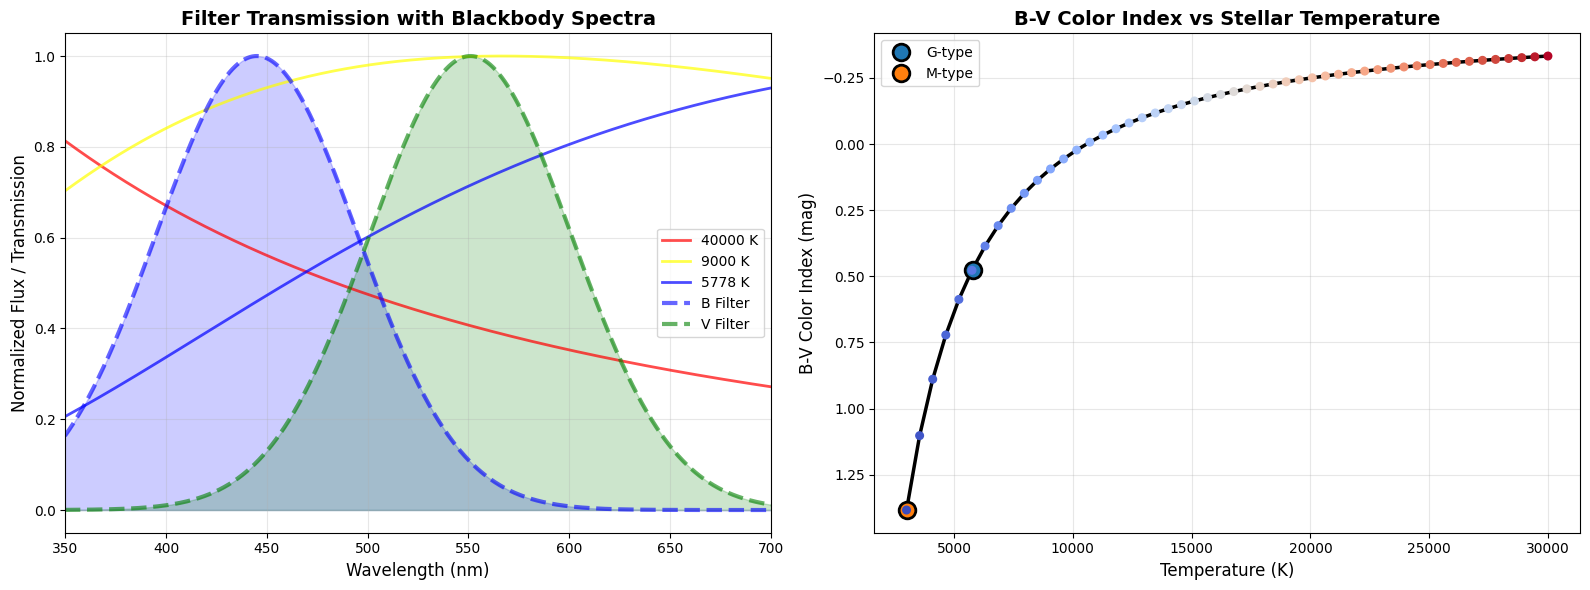


🎨 Color Index Interpretation:
• B-V > 1.0: Red stars (cool)
• B-V ≈ 0.6: Yellow stars (like our Sun)
• B-V < 0.0: Blue stars (hot)

By measuring B-V, we estimate stellar temperature!


In [64]:
# Simulate simple filter transmission functions
# Johnson B and V filters (approximate)

def gaussian_filter(wavelengths, center, width):
    """Create a Gaussian-shaped filter transmission function"""
    return np.exp(-0.5 * ((wavelengths - center) / width)**2)

# Define filter properties (approximate)
filter_B_center = 445 * u.nm  # Blue filter
filter_B_width = 50 * u.nm
filter_V_center = 551 * u.nm  # Visual filter
filter_V_width = 50 * u.nm

# Create wavelength array for integration
wave_array = np.linspace(300, 900, 2000) * u.nm

# Calculate B and V magnitudes for each stellar temperature
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Show filter transmission with blackbody spectra
for (name, temp), color in zip(list(temperatures.items())[:3], ['red', 'yellow', 'blue']):
    bb = BlackBody(temperature=temp)
    flux = bb(wave_array)
    ax1.plot(wave_array, flux/flux.max(), label=f'{temp.value:.0f} K', 
             linewidth=2, color=color, alpha=0.7)

# Add filter transmission curves
filter_B = gaussian_filter(wave_array.value, filter_B_center.value, filter_B_width.value)
filter_V = gaussian_filter(wave_array.value, filter_V_center.value, filter_V_width.value)

ax1.plot(wave_array, filter_B, 'b--', linewidth=3, label='B Filter', alpha=0.6)
ax1.plot(wave_array, filter_V, 'g--', linewidth=3, label='V Filter', alpha=0.6)
ax1.fill_between(wave_array.value, 0, filter_B, alpha=0.2, color='blue')
ax1.fill_between(wave_array.value, 0, filter_V, alpha=0.2, color='green')

ax1.set_xlabel('Wavelength (nm)', fontsize=12)
ax1.set_ylabel('Normalized Flux / Transmission', fontsize=12)
ax1.set_title('Filter Transmission with Blackbody Spectra', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(350, 700)

# Right plot: B-V color index vs Temperature
bv_colors = []
temps_list = []

for temp_value in np.linspace(3000, 30000, 50):
    temp = temp_value * u.K
    bb = BlackBody(temperature=temp)
    flux = bb(wave_array)
    
    # Integrate flux through each filter
    flux_B = np.trapz(flux.value * filter_B, wave_array.value)
    flux_V = np.trapz(flux.value * filter_V, wave_array.value)
    
    # Calculate B-V color index (magnitude difference)
    # B-V = -2.5 * log10(flux_B / flux_V) + constant
    # For simplicity, we'll use relative values
    bv = -2.5 * np.log10(flux_B / flux_V)
    
    bv_colors.append(bv)
    temps_list.append(temp_value)

ax2.plot(temps_list, bv_colors, 'k-', linewidth=2.5)
ax2.scatter(temps_list, bv_colors, c=temps_list, cmap='coolwarm', s=30, zorder=3)

# Mark our example stars
for name, temp in temperatures.items():
    if temp.value in [3000, 5778, 25000]:
        idx = np.argmin(np.abs(np.array(temps_list) - temp.value))
        ax2.plot(temp.value, bv_colors[idx], 'o', markersize=12, 
                markeredgewidth=2, markeredgecolor='black', 
                label=f'{name.split("(")[0].strip()}')

ax2.set_xlabel('Temperature (K)', fontsize=12)
ax2.set_ylabel('B-V Color Index (mag)', fontsize=12)
ax2.set_title('B-V Color Index vs Stellar Temperature', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.invert_yaxis()  # Astronomers plot magnitudes inverted

plt.tight_layout()
plt.show()

print("\n🎨 Color Index Interpretation:")
print("• B-V > 1.0: Red stars (cool)")
print("• B-V ≈ 0.6: Yellow stars (like our Sun)")
print("• B-V < 0.0: Blue stars (hot)")
print("\nBy measuring B-V, we estimate stellar temperature!")

## 4. Beyond Photometry: The Power of Spectroscopy

While photometry gives us temperature estimates, **spectroscopy** reveals so much more:

### What Spectra Tell Us:
1. **Precise Temperature** - From line ratios and continuum shape
2. **Chemical Composition** - Each element has unique absorption lines
3. **Surface Gravity** - Line widths reveal atmospheric density
4. **Rotation** - Line broadening from Doppler shifts
5. **Radial Velocity** - Overall Doppler shift
6. **Magnetic Fields** - Zeeman splitting of lines

### Types of Spectra:
- **Continuous Spectrum**: Smooth blackbody-like emission (from dense, hot gas)
- **Absorption Spectrum**: Dark lines on bright background (stellar atmospheres)
- **Emission Spectrum**: Bright lines on dark background (hot, thin gas in nebulae)

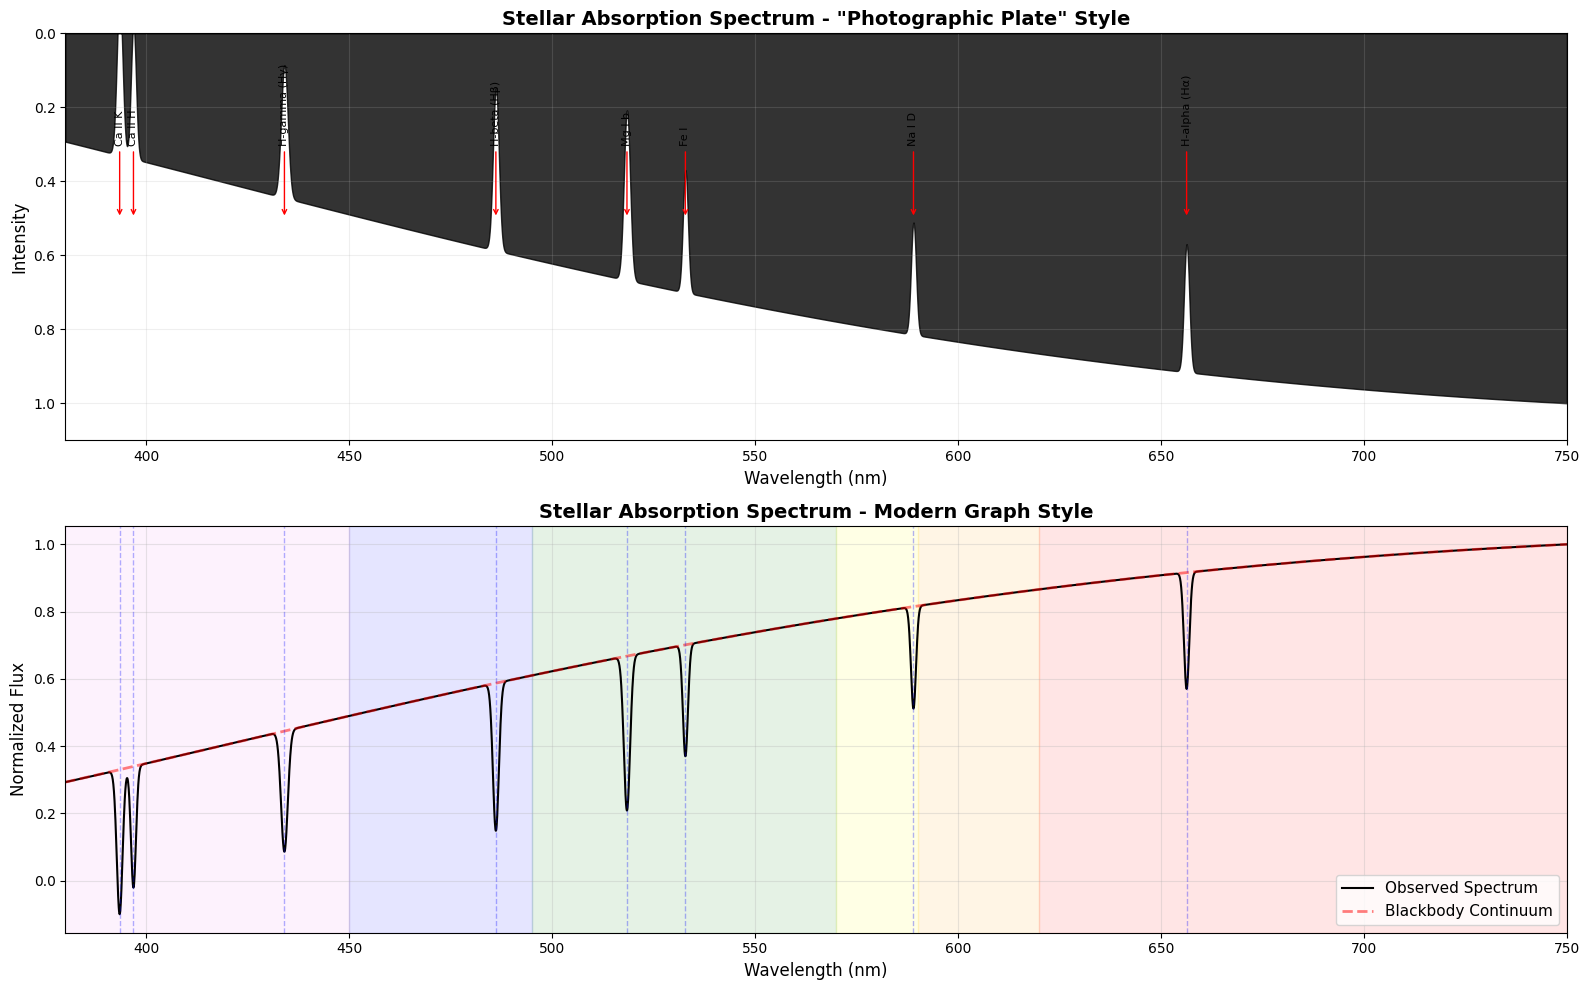


🌟 Absorption Lines Reveal:
• Each dip corresponds to a specific atom/ion absorbing photons
• H-alpha, H-beta, H-gamma: Hydrogen (most abundant element)
• Ca II K & H: Ionized calcium (strong in solar-type stars)
• Na I D: Neutral sodium
• These 'fingerprints' reveal the star's chemical composition!


In [65]:
# Simulate a simple stellar absorption spectrum
# We'll add absorption lines to a blackbody continuum

# Use Sun-like temperature
T_sun = 5778 * u.K
bb_sun = BlackBody(temperature=T_sun)

# Wavelength range in visible spectrum
wavelengths_vis = np.linspace(380, 750, 5000) * u.nm
continuum = bb_sun(wavelengths_vis)

# Normalize continuum
continuum_norm = continuum / continuum.max()

# Define some prominent absorption lines (wavelengths in nm)
# These are simplified representations of real stellar lines
absorption_lines = {
    'H-alpha (Hα)': 656.3,      # Hydrogen
    'H-beta (Hβ)': 486.1,       # Hydrogen
    'H-gamma (Hγ)': 434.0,      # Hydrogen
    'Ca II K': 393.4,           # Calcium
    'Ca II H': 396.8,           # Calcium
    'Na I D': 589.0,            # Sodium (doublet approximated)
    'Mg I b': 518.4,            # Magnesium
    'Fe I': 532.8,              # Iron (one of many)
}

# Create absorption spectrum
spectrum = continuum_norm.value.copy()

for line_name, line_wave in absorption_lines.items():
    # Create Gaussian absorption line
    depth = 0.3 + 0.2 * np.random.random()  # Random depth
    width = 0.5 + 0.5 * np.random.random()   # Random width
    
    line_profile = depth * np.exp(-0.5 * ((wavelengths_vis.value - line_wave) / width)**2)
    spectrum -= line_profile

# Create figure with two panels
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Top panel: Traditional "plate" style (dark lines on bright background)
ax1.fill_between(wavelengths_vis.value, 0, spectrum, color='black', alpha=0.8)
ax1.set_ylim(0, 1.1)
ax1.set_xlim(380, 750)
ax1.set_xlabel('Wavelength (nm)', fontsize=12)
ax1.set_ylabel('Intensity', fontsize=12)
ax1.set_title('Stellar Absorption Spectrum - "Photographic Plate" Style', 
              fontsize=14, fontweight='bold')
ax1.invert_yaxis()  # Invert to show dark lines on bright background
ax1.set_facecolor('white')
ax1.grid(True, alpha=0.2)

# Add element labels
for line_name, line_wave in absorption_lines.items():
    if 380 < line_wave < 750:
        ax1.annotate(line_name, xy=(line_wave, 0.5), xytext=(line_wave, 0.3),
                    fontsize=8, ha='center', rotation=90,
                    arrowprops=dict(arrowstyle='->', color='red', lw=1))

# Bottom panel: Modern graph style (intensity vs wavelength)
ax2.plot(wavelengths_vis.value, spectrum, 'k-', linewidth=1.5, label='Observed Spectrum')
ax2.plot(wavelengths_vis.value, continuum_norm.value, 'r--', linewidth=2, 
         alpha=0.5, label='Blackbody Continuum')

# Mark absorption lines
for line_name, line_wave in absorption_lines.items():
    if 380 < line_wave < 750:
        ax2.axvline(line_wave, color='blue', alpha=0.3, linestyle='--', linewidth=1)
        
ax2.set_xlabel('Wavelength (nm)', fontsize=12)
ax2.set_ylabel('Normalized Flux', fontsize=12)
ax2.set_title('Stellar Absorption Spectrum - Modern Graph Style', 
              fontsize=14, fontweight='bold')
ax2.set_xlim(380, 750)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

# Add colored background for visible spectrum
colors_vis = ['violet', 'blue', 'green', 'yellow', 'orange', 'red']
bounds = [380, 450, 495, 570, 590, 620, 750]
for i in range(len(colors_vis)):
    ax2.axvspan(bounds[i], bounds[i+1], alpha=0.1, color=colors_vis[i])

plt.tight_layout()
plt.show()

print("\n🌟 Absorption Lines Reveal:")
print("• Each dip corresponds to a specific atom/ion absorbing photons")
print("• H-alpha, H-beta, H-gamma: Hydrogen (most abundant element)")
print("• Ca II K & H: Ionized calcium (strong in solar-type stars)")
print("• Na I D: Neutral sodium")
print("• These 'fingerprints' reveal the star's chemical composition!")

## 5. Spectral Classification: The Harvard System

Stars are classified by their spectra into types: **O, B, A, F, G, K, M**
(Mnemonic: "Oh Be A Fine Girl/Guy, Kiss Me")

Each type has characteristic absorption lines and temperature ranges:

| Type | Temperature (K) | Color | Peak Emission | Key Features |
|------|----------------|-------|---------------|--------------|
| **O** | 30,000 - 50,000+ | Blue | **UV** | He II (ionized helium), weak H, **extreme energy** |
| **B** | 10,000 - 25,000 | Blue-white | UV-Blue | He I, stronger H, still very hot |
| **A** | 7,500 - 10,000 | White | Blue-White | **Strongest H Balmer lines**, weak metals |
| **F** | 6,000 - 7,500 | Yellow-white | White | Weaker H, stronger Ca II, Fe lines |
| **G** | 5,000 - 6,000 | Yellow | Green-Yellow | Ca II strong, many metals, **Sun is G2V** |
| **K** | 3,700 - 5,200 | Orange | Orange-Red | Strong metals, molecular bands (CN, TiO) |
| **M** | 2,400 - 3,700 | Red | **Near-IR** | TiO bands, very cool, **~75% of all stars!** |

### Detailed Characteristics by Spectral Type:

**O-type Stars** (Hottest, Rarest):
- Temperature: **30,000 - 50,000+ K**
- Peak emission in **ultraviolet (UV)** - high energy!
- Strong ionized helium (He II) lines - requires extreme heat
- Appear blue or bluish-white
- Very rare, massive, short-lived
- Examples: ζ Puppis, λ Orionis

**B-type Stars**:
- Temperature: **10,000 - 25,000 K**
- Strong neutral helium (He I) and hydrogen lines
- Blue-white appearance
- Examples: Rigel (B8), Spica (B1)

**A-type Stars** (White):
- Temperature: **7,500 - 10,000 K**
- **Strongest hydrogen Balmer absorption lines** at this temperature
- White to blue-white appearance
- Examples: Vega (A0V), Sirius A (A1V), Altair (A7V)

**F-type Stars**:
- Temperature: **6,000 - 7,500 K**
- Hydrogen lines weaker, Ca II stronger
- Yellow-white appearance
- Examples: Procyon (F5)

**G-type Stars** (Sun-like):
- Temperature: **5,000 - 6,000 K** (main sequence: 5,300-6,000 K)
- **Our Sun: 5,778 K (G2V spectral type)**
- Strong Ca II H & K lines, many metal lines
- Yellow to yellowish-white
- Peak emission in green (~500 nm) but appears yellow-white
- Examples: Sun (G2V), Alpha Centauri A (G2V)

**K-type Stars** (Orange Dwarfs):
- Temperature: **3,700 - 5,200 K**
- Strong metal lines (Fe, Ca, Mg)
- Molecular bands start appearing (CN, TiO at cooler end)
- Orange appearance
- **Very stable, long-lived - important for habitability!**
- Examples: Alpha Centauri B (K1V, ~5,170 K), Epsilon Eridani (K2V)

**M-type Stars** (Red Dwarfs) - **Most Common in Galaxy**:
- Temperature: **2,400 - 3,700 K** (can go down to ~2,000 K for M9V)
- Peak emission in **near-infrared (IR)** - felt as heat
- Strong **TiO (titanium oxide) molecular absorption bands**
- Deep red appearance
- **~75% of all stars in the Milky Way are M-type red dwarfs!**
- Very low mass, extremely long-lived (trillions of years)
- Examples: Proxima Centauri (M5.5V), Barnard's Star (M4V)

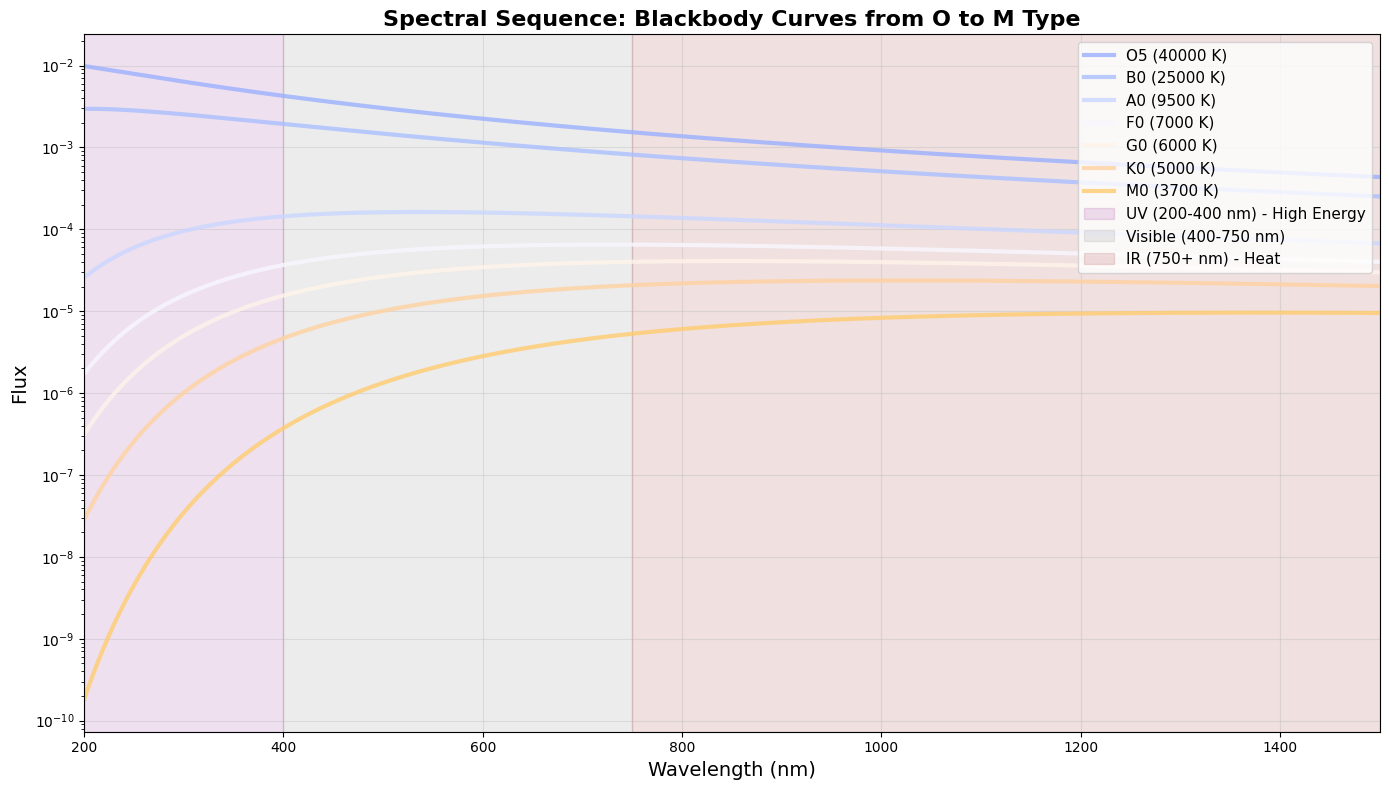


📊 The Spectral Sequence:
From O (hottest, blue) → M (coolest, red)

Notice:
• Peak shifts dramatically from UV (O-type) to IR (M-type)
• O-type stars emit most energy in UV region (high energy, short wavelength)
• M-type stars emit most energy in near-IR region (heat, long wavelength)
• Total energy output (area under curve) decreases from O to M
• Most stars we see are actually K and M dwarfs (~75% are M-type!)
• Our Sun (G2V) is NOT average - it's hotter than most stars!

🌈 Electromagnetic Spectrum Regions:
• UV (10-400 nm): High energy, causes sunburn, sterilization
• Visible (400-750 nm): What our eyes detect
• IR (750+ nm): Felt as heat, thermal imaging, night vision


In [66]:
# Visualize the spectral sequence with blackbody curves
# Updated with scientifically accurate temperatures for each spectral type
spectral_types = {
    'O5': 40000,  # Hot blue giant (O-type: 30,000-50,000+ K)
    'B0': 25000,  # Early B-type, blue-white (B-type: 10,000-25,000 K)
    'A0': 9500,   # A0 has strongest H Balmer lines (A-type: 7,500-10,000 K)
    'F0': 7000,   # Yellow-white (F-type: 6,000-7,500 K)
    'G0': 6000,   # Early G-type, yellow (G-type: 5,000-6,000 K main sequence)
    'K0': 5000,   # Orange dwarf (K-type: 3,700-5,200 K)
    'M0': 3700    # Red dwarf, upper M-type (M-type: 2,400-3,700 K)
}

fig, ax = plt.subplots(figsize=(14, 8))

wavelengths_seq = np.linspace(200, 1500, 3000) * u.nm

# Color map matching actual stellar colors more accurately
color_map = {
    'O5': '#9BB0FF',  # Blue (O-type: peaks in UV!)
    'B0': '#AABFFF',  # Blue-white
    'A0': '#CAD7FF',  # White (strongest H Balmer lines)
    'F0': '#F8F7FF',  # Yellow-white
    'G0': '#FFF4EA',  # Yellow (like our Sun!)
    'K0': '#FFD2A1',  # Orange
    'M0': '#FFCC6F'   # Red (peaks in near-IR!)
}

for spec_type, temp in spectral_types.items():
    bb = BlackBody(temperature=temp * u.K)
    flux = bb(wavelengths_seq)
    
    ax.plot(wavelengths_seq, flux, label=f'{spec_type} ({temp} K)', 
            linewidth=3, color=color_map[spec_type], alpha=0.8)

# Mark UV, Visible, and IR regions of the electromagnetic spectrum
ax.axvspan(200, 400, alpha=0.12, color='purple', label='UV (200-400 nm) - High Energy')
ax.axvspan(400, 750, alpha=0.15, color='gray', label='Visible (400-750 nm)')
ax.axvspan(750, 1500, alpha=0.12, color='darkred', label='IR (750+ nm) - Heat')

ax.set_xlabel('Wavelength (nm)', fontsize=14)
ax.set_ylabel('Flux', fontsize=14)
ax.set_title('Spectral Sequence: Blackbody Curves from O to M Type', 
             fontsize=16, fontweight='bold')
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xlim(200, 1500)
ax.set_yscale('log')

plt.tight_layout()
plt.show()

print("\n📊 The Spectral Sequence:")
print("From O (hottest, blue) → M (coolest, red)")
print("\nNotice:")
print("• Peak shifts dramatically from UV (O-type) to IR (M-type)")
print("• O-type stars emit most energy in UV region (high energy, short wavelength)")
print("• M-type stars emit most energy in near-IR region (heat, long wavelength)")
print("• Total energy output (area under curve) decreases from O to M")
print("• Most stars we see are actually K and M dwarfs (~75% are M-type!)") 
print("• Our Sun (G2V) is NOT average - it's hotter than most stars!")
print("\n🌈 Electromagnetic Spectrum Regions:")
print("• UV (10-400 nm): High energy, causes sunburn, sterilization")
print("• Visible (400-750 nm): What our eyes detect")
print("• IR (750+ nm): Felt as heat, thermal imaging, night vision")

## 6. Next Steps in Our Journey

We've laid the foundation! Here's where we're headed:

### Future Topics:
1. **Line Formation** - Why do we see absorption lines? (Excitation, ionization)
2. **Equivalent Width** - Measuring line strength quantitatively
3. **Curve of Growth** - Relating line strength to element abundance
4. **Saha Equation** - Temperature and ionization states
5. **Boltzmann Equation** - Temperature and excitation states
6. **Actual Stellar Data** - Working with real spectra from surveys
7. **Abundance Analysis** - Determining what stars are made of
8. **Doppler Analysis** - Measuring stellar velocities
9. **Binary Stars** - Spectroscopic binaries and radial velocity curves

### Tools We'll Use:
- **Astropy** - For astronomical calculations and data handling
- **Specutils** - For working with spectral data
- **Synphot** - For synthetic photometry
- **Real Data** - From SDSS, LAMOST, or other spectroscopic surveys

---

## 🌠 "The journey of a thousand stars begins with a single photon!"

Ready to continue? Let's dive deeper into the physics of line formation and start analyzing real stellar spectra!

In [67]:
# Summary statistics and key constants
from astropy.constants import h, c, k_B, sigma_sb

print("=" * 70)
print("KEY PHYSICAL CONSTANTS FOR STELLAR SPECTROSCOPY")
print("=" * 70)
print(f"\nPlanck constant (h):           {h}")
print(f"Speed of light (c):            {c}")
print(f"Boltzmann constant (k_B):      {k_B}")
print(f"Stefan-Boltzmann constant (σ): {sigma_sb}")
print(f"Wien displacement constant:    {b_wien}")

print("\n" + "=" * 70)
print("REFERENCE STELLAR PARAMETERS")
print("=" * 70)
print(f"\nSun:")
print(f"  Temperature:      5778 K")
print(f"  Spectral Type:    G2V")
print(f"  Peak Wavelength:  ~502 nm (green, but looks yellow-white)")
print(f"  Composition:      ~73% H, ~25% He, ~2% metals")

print("\n✨ We're ready to explore the chemical makeup of the cosmos!")
print("🔬 Next: Let's get some real stellar spectra and analyze them!")

KEY PHYSICAL CONSTANTS FOR STELLAR SPECTROSCOPY

Planck constant (h):           6.62607015e-34 J s
Speed of light (c):            299792458.0 m / s
Boltzmann constant (k_B):      1.380649e-23 J / K
Stefan-Boltzmann constant (σ): 5.6703744191844314e-08 W / (m2 K4)
Wien displacement constant:    0.0028977719551851727 K m

REFERENCE STELLAR PARAMETERS

Sun:
  Temperature:      5778 K
  Spectral Type:    G2V
  Peak Wavelength:  ~502 nm (green, but looks yellow-white)
  Composition:      ~73% H, ~25% He, ~2% metals

✨ We're ready to explore the chemical makeup of the cosmos!
🔬 Next: Let's get some real stellar spectra and analyze them!


---

## 7. Emission Spectra: A Different Kind of Light

While stars show **absorption spectra** (dark lines on bright continuum), some celestial objects show **emission spectra** (bright lines on dark background)!

### The Discovery of Emission Lines

On August 29, 1864, astronomer William Huggins pointed his spectroscope at a planetary nebula (NGC 6543) in Draco:

> *"The reader may now be able to picture to himself to some extent the feeling of excited suspense, mingled with a degree of awe, with which, after a few moments of hesitation, I put my eye to the spectroscope. Was I not about to look into a secret place of creation? I looked into the spectroscope. No spectrum such as I expected! A single bright line only!"*

Planetary nebulae, hot gas clouds, and emission nebulae show bright emission lines instead of absorption!

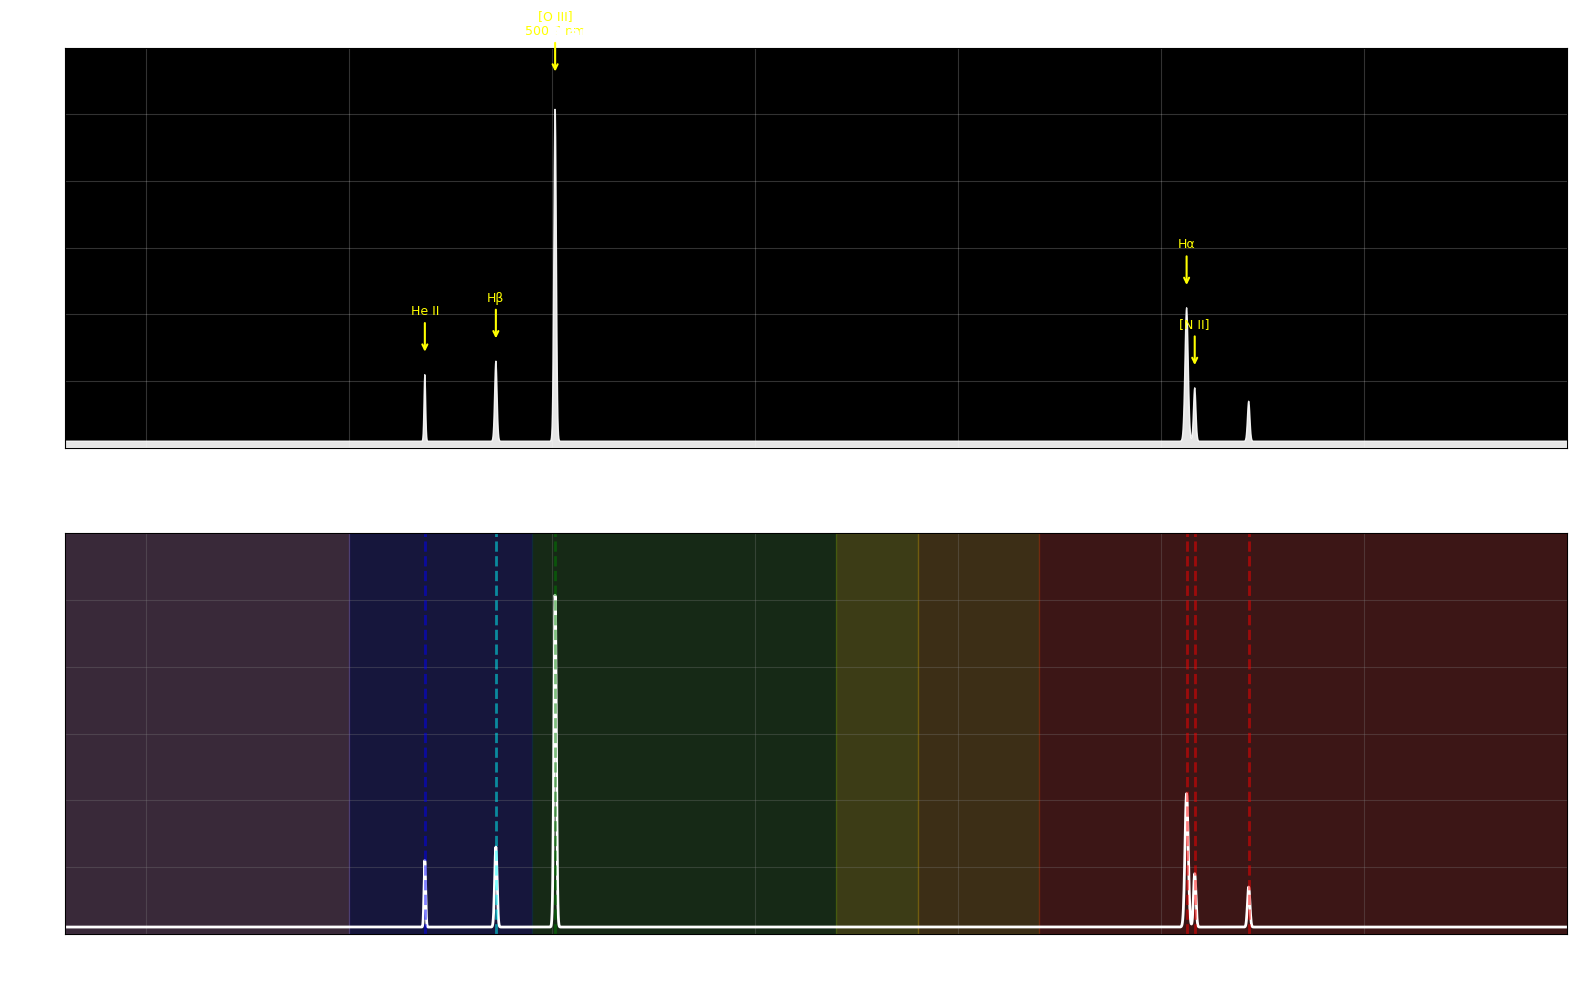


🌌 Emission Lines in Planetary Nebulae:
• [O III] at 500.7 nm - Doubly ionized oxygen (VERY bright!)
• H-alpha and H-beta - Hydrogen recombination lines
• [N II] - Ionized nitrogen
• [S II] - Ionized sulfur
• He II - Ionized helium (very hot regions)

[Brackets] indicate 'forbidden' lines - only possible in very thin gas!


In [68]:
# Simulate emission spectrum of a planetary nebula
# Common emission lines in planetary nebulae

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Wavelength range
wavelengths_em = np.linspace(350, 750, 5000) * u.nm

# Create a very weak continuum (almost zero)
weak_continuum = np.ones_like(wavelengths_em.value) * 0.05

# Emission lines for a planetary nebula
# These are some of the brightest lines observed
emission_lines = {
    'H-beta (Hβ)': {'wave': 486.1, 'strength': 0.6, 'width': 0.3, 'color': 'cyan'},
    '[O III]': {'wave': 495.9, 'strength': 0.8, 'width': 0.3, 'color': 'green'},
    '[O III]': {'wave': 500.7, 'strength': 2.5, 'width': 0.3, 'color': 'green'},  # Strongest line
    'H-alpha (Hα)': {'wave': 656.3, 'strength': 1.0, 'width': 0.4, 'color': 'red'},
    '[N II]': {'wave': 658.3, 'strength': 0.4, 'width': 0.3, 'color': 'red'},
    '[S II]': {'wave': 671.6, 'strength': 0.3, 'width': 0.3, 'color': 'red'},
    'He II': {'wave': 468.6, 'strength': 0.5, 'width': 0.2, 'color': 'blue'},
}

# Create emission spectrum
emission_spectrum = weak_continuum.copy()

for line_name, props in emission_lines.items():
    line_wave = props['wave']
    strength = props['strength']
    width = props['width']
    
    # Create Gaussian emission line (positive!)
    line_profile = strength * np.exp(-0.5 * ((wavelengths_em.value - line_wave) / width)**2)
    emission_spectrum += line_profile

# Top panel: Emission spectrum (bright lines on dark background)
ax1.fill_between(wavelengths_em.value, 0, emission_spectrum, color='white', alpha=0.9)
ax1.set_facecolor('black')
ax1.set_ylim(0, 3)
ax1.set_xlim(380, 750)
ax1.set_xlabel('Wavelength (nm)', fontsize=12, color='white')
ax1.set_ylabel('Intensity', fontsize=12, color='white')
ax1.set_title('Planetary Nebula Emission Spectrum (NGC 6543)', 
              fontsize=14, fontweight='bold', color='white')
ax1.tick_params(colors='white')
ax1.grid(True, alpha=0.2, color='white')

# Add element labels
label_positions = {
    'He II': (468.6, 0.7),
    'Hβ': (486.1, 0.8),
    '[O III]\n500.7 nm': (500.7, 2.8),
    'Hα': (656.3, 1.2),
    '[N II]': (658.3, 0.6),
}

for label, (wave, height) in label_positions.items():
    ax1.annotate(label, xy=(wave, height), xytext=(wave, height + 0.3),
                fontsize=9, ha='center', color='yellow',
                arrowprops=dict(arrowstyle='->', color='yellow', lw=1.5))

# Bottom panel: Modern graph style
ax2.plot(wavelengths_em.value, emission_spectrum, 'w-', linewidth=2, label='Emission Spectrum')
ax2.set_facecolor('#1a1a1a')

# Highlight the brightest lines
for line_name, props in emission_lines.items():
    line_wave = props['wave']
    line_color = props['color']
    if 380 < line_wave < 750:
        ax2.axvline(line_wave, color=line_color, alpha=0.5, linestyle='--', linewidth=2)

ax2.set_xlabel('Wavelength (nm)', fontsize=12, color='white')
ax2.set_ylabel('Intensity', fontsize=12, color='white')
ax2.set_title('Emission Lines vs Absorption Lines', fontsize=14, fontweight='bold', color='white')
ax2.set_xlim(380, 750)
ax2.set_ylim(0, 3)
ax2.tick_params(colors='white')
ax2.grid(True, alpha=0.3, color='gray')

# Add colored background for visible spectrum
colors_vis = ['violet', 'blue', 'green', 'yellow', 'orange', 'red']
bounds = [380, 450, 495, 570, 590, 620, 750]
for i in range(len(colors_vis)):
    ax2.axvspan(bounds[i], bounds[i+1], alpha=0.15, color=colors_vis[i])

plt.tight_layout()
plt.show()

print("\n🌌 Emission Lines in Planetary Nebulae:")
print("• [O III] at 500.7 nm - Doubly ionized oxygen (VERY bright!)")
print("• H-alpha and H-beta - Hydrogen recombination lines")
print("• [N II] - Ionized nitrogen")
print("• [S II] - Ionized sulfur")
print("• He II - Ionized helium (very hot regions)")
print("\n[Brackets] indicate 'forbidden' lines - only possible in very thin gas!")

## 8. Kirchhoff's Laws: The Rosetta Stone of Spectroscopy

In the 1850s, German physicist **Gustav Kirchhoff** figured out why we see different types of spectra. His three laws explain everything:

### Kirchhoff's Three Laws:

1. **Continuous Spectrum**: A hot, dense object (solid, liquid, or dense gas) emits light at all wavelengths
   - Example: The hot interior of a star, or a heated metal

2. **Emission Spectrum**: A hot, thin gas emits light only at specific wavelengths characteristic of its composition
   - Example: Planetary nebulae, emission nebulae, gas discharge lamps

3. **Absorption Spectrum**: A cool, thin gas in front of a continuous source absorbs light at the same specific wavelengths it would emit
   - Example: Stellar atmospheres, the Sun's photosphere

### The Key Insight:
**Each element absorbs and emits at exactly the same wavelengths!**

This is the foundation of all spectroscopic analysis.

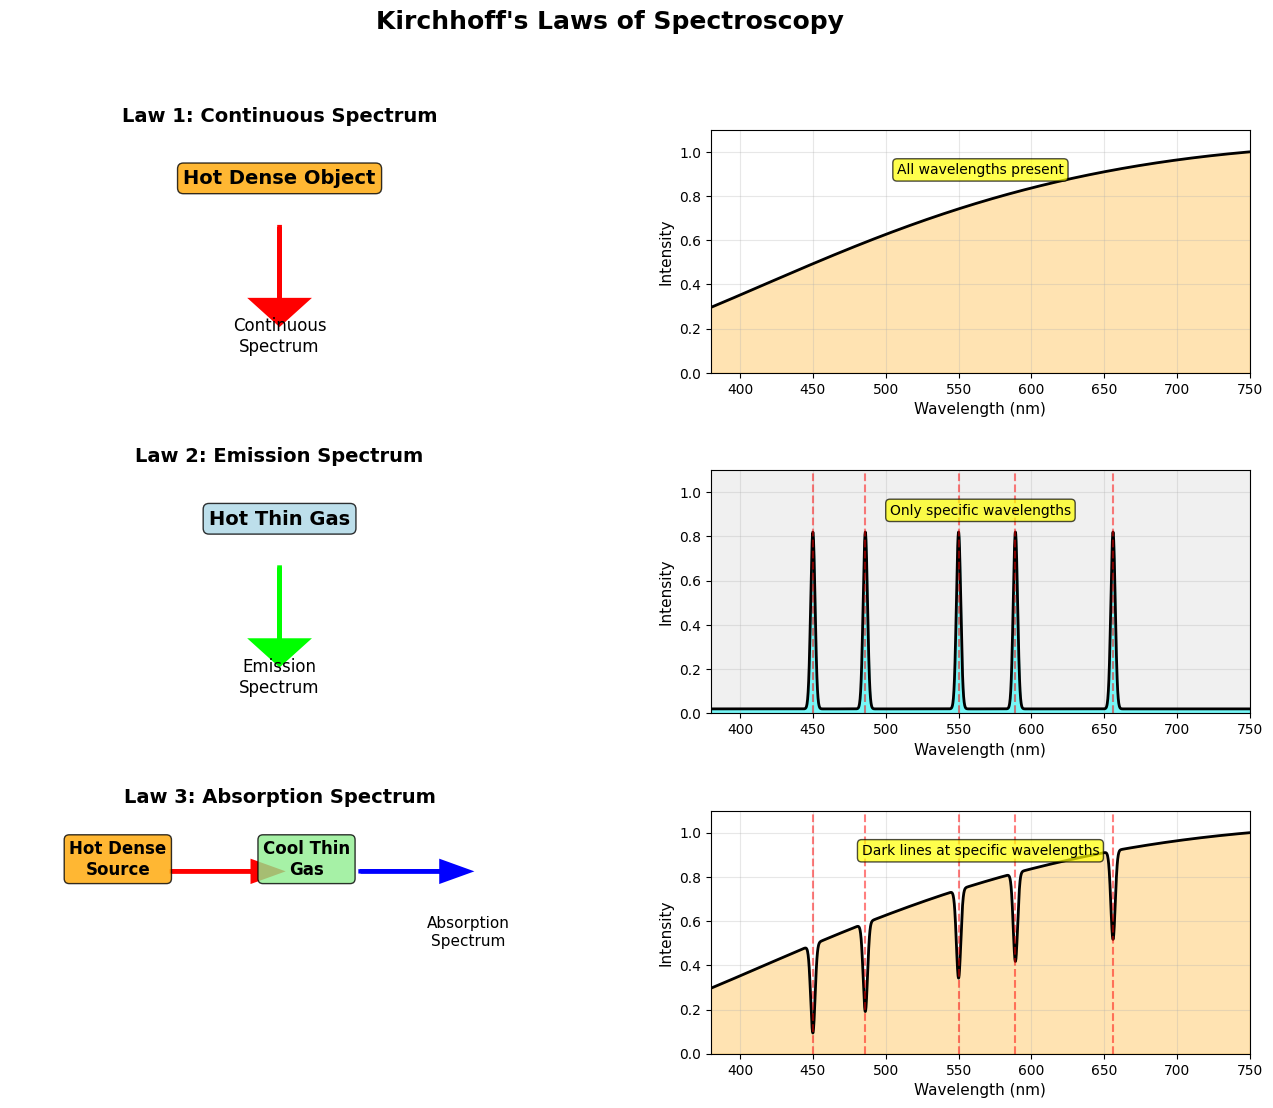


📜 Kirchhoff's Insight:
• The SAME gas emits AND absorbs at the SAME wavelengths
• This allows us to identify elements in distant stars!
• A stellar spectrum = Hot dense core (continuous) + Cool thin atmosphere (absorption)

🌟 This explains stellar photospheres perfectly!


In [69]:
# Visualize Kirchhoff's Three Laws

fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.4, wspace=0.3)

wavelengths_k = np.linspace(380, 750, 3000)

# Define some sample absorption/emission wavelengths
sample_lines = [450, 486, 550, 589, 656]

# LAW 1: Continuous Spectrum
ax1 = fig.add_subplot(gs[0, 0])
ax1_spectrum = fig.add_subplot(gs[0, 1])

# Diagram
ax1.text(0.5, 0.8, 'Hot Dense Object', ha='center', va='center', 
         fontsize=14, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='orange', alpha=0.8))
ax1.arrow(0.5, 0.6, 0, -0.3, head_width=0.1, head_length=0.1, fc='red', ec='red', linewidth=3)
ax1.text(0.5, 0.15, 'Continuous\nSpectrum', ha='center', va='center', fontsize=12)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.axis('off')
ax1.set_title("Law 1: Continuous Spectrum", fontsize=14, fontweight='bold')

# Spectrum
continuum = BlackBody(temperature=5800*u.K)(wavelengths_k * u.nm)
ax1_spectrum.plot(wavelengths_k, continuum/continuum.max(), 'k-', linewidth=2)
ax1_spectrum.fill_between(wavelengths_k, 0, continuum/continuum.max(), alpha=0.3, color='orange')
ax1_spectrum.set_xlim(380, 750)
ax1_spectrum.set_ylim(0, 1.1)
ax1_spectrum.set_xlabel('Wavelength (nm)', fontsize=11)
ax1_spectrum.set_ylabel('Intensity', fontsize=11)
ax1_spectrum.grid(True, alpha=0.3)
ax1_spectrum.text(565, 0.9, 'All wavelengths present', ha='center', fontsize=10, 
                  bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# LAW 2: Emission Spectrum
ax2 = fig.add_subplot(gs[1, 0])
ax2_spectrum = fig.add_subplot(gs[1, 1])

# Diagram
ax2.text(0.5, 0.8, 'Hot Thin Gas', ha='center', va='center', 
         fontsize=14, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
ax2.arrow(0.5, 0.6, 0, -0.3, head_width=0.1, head_length=0.1, fc='lime', ec='lime', linewidth=3)
ax2.text(0.5, 0.15, 'Emission\nSpectrum', ha='center', va='center', fontsize=12)
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.axis('off')
ax2.set_title("Law 2: Emission Spectrum", fontsize=14, fontweight='bold')

# Spectrum
emission = np.ones_like(wavelengths_k) * 0.02
for line_wave in sample_lines:
    emission += 0.8 * np.exp(-0.5 * ((wavelengths_k - line_wave) / 1.5)**2)

ax2_spectrum.plot(wavelengths_k, emission, 'k-', linewidth=2)
ax2_spectrum.fill_between(wavelengths_k, 0, emission, alpha=0.5, color='cyan')
ax2_spectrum.set_xlim(380, 750)
ax2_spectrum.set_ylim(0, 1.1)
ax2_spectrum.set_xlabel('Wavelength (nm)', fontsize=11)
ax2_spectrum.set_ylabel('Intensity', fontsize=11)
ax2_spectrum.grid(True, alpha=0.3)
ax2_spectrum.set_facecolor('#f0f0f0')
ax2_spectrum.text(565, 0.9, 'Only specific wavelengths', ha='center', fontsize=10,
                  bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# LAW 3: Absorption Spectrum
ax3 = fig.add_subplot(gs[2, 0])
ax3_spectrum = fig.add_subplot(gs[2, 1])

# Diagram
ax3.text(0.2, 0.8, 'Hot Dense\nSource', ha='center', va='center', 
         fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='orange', alpha=0.8))
ax3.arrow(0.3, 0.75, 0.15, 0, head_width=0.08, head_length=0.05, fc='red', ec='red', linewidth=3)
ax3.text(0.55, 0.8, 'Cool Thin\nGas', ha='center', va='center', 
         fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
ax3.arrow(0.65, 0.75, 0.15, 0, head_width=0.08, head_length=0.05, fc='blue', ec='blue', linewidth=3)
ax3.text(0.85, 0.5, 'Absorption\nSpectrum', ha='center', va='center', fontsize=11)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)
ax3.axis('off')
ax3.set_title("Law 3: Absorption Spectrum", fontsize=14, fontweight='bold')

# Spectrum
absorption = continuum/continuum.max()
for line_wave in sample_lines:
    absorption -= 0.4 * np.exp(-0.5 * ((wavelengths_k - line_wave) / 1.5)**2)

ax3_spectrum.plot(wavelengths_k, absorption, 'k-', linewidth=2)
ax3_spectrum.fill_between(wavelengths_k, 0, absorption, alpha=0.3, color='orange')
ax3_spectrum.set_xlim(380, 750)
ax3_spectrum.set_ylim(0, 1.1)
ax3_spectrum.set_xlabel('Wavelength (nm)', fontsize=11)
ax3_spectrum.set_ylabel('Intensity', fontsize=11)
ax3_spectrum.grid(True, alpha=0.3)
ax3_spectrum.text(565, 0.9, 'Dark lines at specific wavelengths', ha='center', fontsize=10,
                  bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# Mark the same wavelengths in Laws 2 and 3 to show they match
for line_wave in sample_lines:
    ax2_spectrum.axvline(line_wave, color='red', linestyle='--', alpha=0.5, linewidth=1.5)
    ax3_spectrum.axvline(line_wave, color='red', linestyle='--', alpha=0.5, linewidth=1.5)

plt.suptitle("Kirchhoff's Laws of Spectroscopy", fontsize=18, fontweight='bold', y=0.98)
plt.show()

print("\n📜 Kirchhoff's Insight:")
print("• The SAME gas emits AND absorbs at the SAME wavelengths")
print("• This allows us to identify elements in distant stars!")
print("• A stellar spectrum = Hot dense core (continuous) + Cool thin atmosphere (absorption)")
print("\n🌟 This explains stellar photospheres perfectly!")

## 9. The Discovery of Helium: Found in the Sun First!

One of the most remarkable stories in spectroscopy is the discovery of **helium** - an element found in the Sun before it was found on Earth!

### The Timeline:

**1868**: During a solar eclipse, astronomers observed a mysterious yellow emission line (587.6 nm) in the Sun's chromosphere that didn't match any known element.

**1868**: English astronomer **Joseph Norman Lockyer** boldly proposed a new element: **"Helium"** (from Greek *helios* = Sun)

Contemporary scientists were skeptical. One poet even wrote:
> *"And Lockyer, and Lockyer,*  
> *grows cockier, and cockier,*  
> *for he thinks he's the owner*  
> *of the solar corona"*

**1895**: William Ramsay isolated a strange inert gas from uranium compounds. Its spectral line matched exactly the solar line!

**Result**: Lockyer was vindicated! Helium became the only element discovered in space before being found on Earth.

### The Mystery of "Nebulium"

**1918**: W. H. Wright at Lick Observatory found two strong emission lines in planetary nebulae at 495.9 nm and 500.7 nm. He proposed another new element: **"nebulium"**

**1927**: I. S. Bowen at Caltech solved the mystery - these weren't from a new element, but from **doubly-ionized oxygen [O III]** in "forbidden" transitions that can only occur in extremely low-density gas!

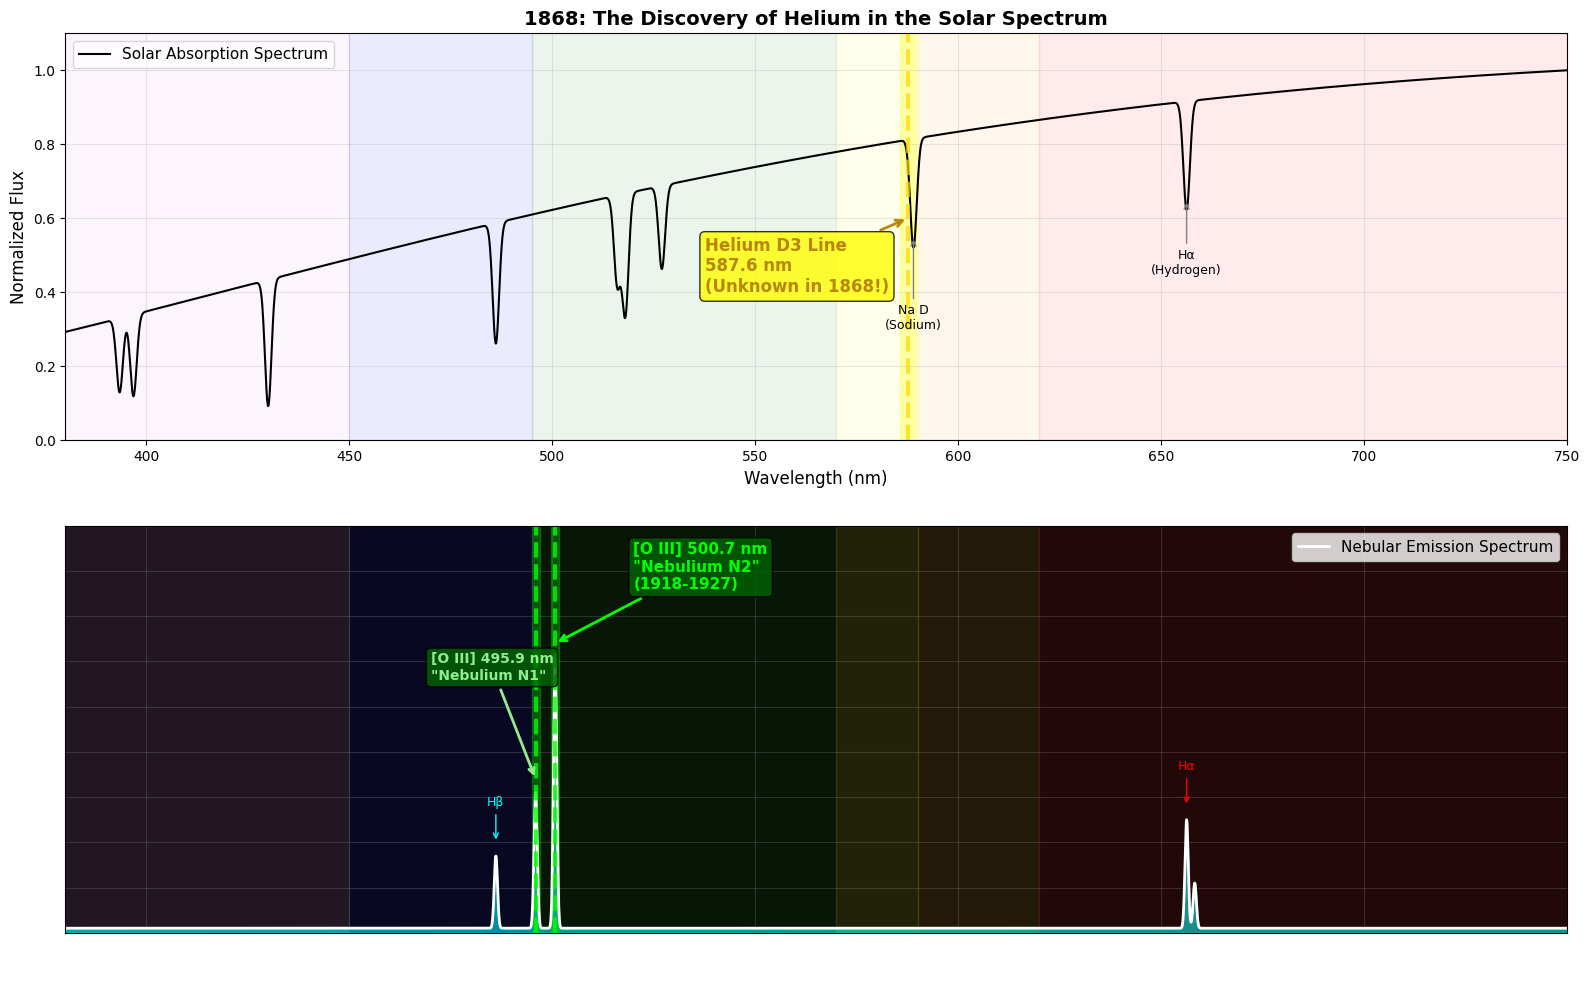


🎭 The Stories:

1. HELIUM (1868-1895):
   • Found in the Sun 27 years before found on Earth!
   • Named after 'Helios' (Greek for Sun)
   • Lockyer was RIGHT - it was a new element!

2. 'NEBULIUM' (1918-1927):
   • NOT a new element - just excited oxygen [O III]
   • 'Forbidden' transitions only possible in very thin gas
   • Densities < 10^6 atoms/cm³ (Earth's atmosphere: 10^19 atoms/cm³!)

💡 These discoveries showed that space contains exotic conditions
   impossible to reproduce in laboratories on Earth!


In [70]:
# Visualize the discovery of Helium and the "Nebulium" mystery

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Wavelength arrays
wavelengths_solar = np.linspace(380, 750, 5000)
wavelengths_nebula = np.linspace(380, 750, 5000)

# PANEL 1: Solar Spectrum showing the Helium D3 line
# Create absorption spectrum (simplified)
solar_continuum = BlackBody(temperature=5778*u.K)(wavelengths_solar * u.nm)
solar_continuum = solar_continuum / solar_continuum.max()

# Add various absorption lines (simplified)
solar_absorption = solar_continuum.value.copy()
absorption_lines_solar = [393.4, 396.8, 430, 486.1, 516, 518, 527, 589.0, 656.3]
for line_wave in absorption_lines_solar:
    depth = 0.2 + 0.15 * np.random.random()
    width = 0.8
    solar_absorption -= depth * np.exp(-0.5 * ((wavelengths_solar - line_wave) / width)**2)

# Plot solar spectrum
ax1.plot(wavelengths_solar, solar_absorption, 'k-', linewidth=1.5, label='Solar Absorption Spectrum')

# Highlight the Helium D3 line
helium_D3 = 587.6
ax1.axvline(helium_D3, color='gold', linestyle='--', linewidth=3, alpha=0.7)
ax1.axvspan(helium_D3-2, helium_D3+2, alpha=0.3, color='yellow')
ax1.annotate('Helium D3 Line\n587.6 nm\n(Unknown in 1868!)', 
             xy=(helium_D3, 0.6), xytext=(helium_D3-50, 0.4),
             fontsize=12, fontweight='bold', color='darkgoldenrod',
             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8),
             arrowprops=dict(arrowstyle='->', color='darkgoldenrod', lw=2))

# Mark some known lines for context
ax1.annotate('Na D\n(Sodium)', xy=(589, 0.55), xytext=(589, 0.3),
             fontsize=9, ha='center',
             arrowprops=dict(arrowstyle='->', color='gray', lw=1))
ax1.annotate('Hα\n(Hydrogen)', xy=(656.3, 0.65), xytext=(656.3, 0.45),
             fontsize=9, ha='center',
             arrowprops=dict(arrowstyle='->', color='gray', lw=1))

ax1.set_xlabel('Wavelength (nm)', fontsize=12)
ax1.set_ylabel('Normalized Flux', fontsize=12)
ax1.set_title('1868: The Discovery of Helium in the Solar Spectrum', 
              fontsize=14, fontweight='bold')
ax1.set_xlim(380, 750)
ax1.set_ylim(0, 1.1)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left', fontsize=11)

# Add colored background
colors_vis = ['violet', 'blue', 'green', 'yellow', 'orange', 'red']
bounds = [380, 450, 495, 570, 590, 620, 750]
for i in range(len(colors_vis)):
    ax1.axvspan(bounds[i], bounds[i+1], alpha=0.08, color=colors_vis[i])

# PANEL 2: Nebular Spectrum showing "Nebulium" lines
# Create emission spectrum
nebula_emission = np.ones_like(wavelengths_nebula) * 0.05

# Strong [O III] "nebulium" lines
nebulium_lines = {
    '[O III] 495.9 nm\n("Nebulium N1")': {'wave': 495.9, 'strength': 1.5},
    '[O III] 500.7 nm\n("Nebulium N2")': {'wave': 500.7, 'strength': 3.0},
}

# Other nebular lines
other_lines = {
    'Hβ': {'wave': 486.1, 'strength': 0.8},
    'Hα': {'wave': 656.3, 'strength': 1.2},
    '[N II]': {'wave': 658.3, 'strength': 0.5},
}

# Add all emission lines
all_lines = {**nebulium_lines, **other_lines}
for line_name, props in all_lines.items():
    line_wave = props['wave']
    strength = props['strength']
    width = 0.4
    nebula_emission += strength * np.exp(-0.5 * ((wavelengths_nebula - line_wave) / width)**2)

# Plot nebular spectrum
ax2.plot(wavelengths_nebula, nebula_emission, 'w-', linewidth=2, label='Nebular Emission Spectrum')
ax2.fill_between(wavelengths_nebula, 0, nebula_emission, alpha=0.6, color='cyan')
ax2.set_facecolor('#0a0a0a')

# Highlight the "Nebulium" lines
for line_name, props in nebulium_lines.items():
    line_wave = props['wave']
    ax2.axvline(line_wave, color='lime', linestyle='--', linewidth=3, alpha=0.8)
    ax2.axvspan(line_wave-1, line_wave+1, alpha=0.3, color='lime')

# Annotate nebulium lines
ax2.annotate('[O III] 500.7 nm\n"Nebulium N2"\n(1918-1927)', 
             xy=(500.7, 3.2), xytext=(520, 3.8),
             fontsize=11, fontweight='bold', color='lime',
             bbox=dict(boxstyle='round', facecolor='darkgreen', alpha=0.8),
             arrowprops=dict(arrowstyle='->', color='lime', lw=2))

ax2.annotate('[O III] 495.9 nm\n"Nebulium N1"', 
             xy=(495.9, 1.7), xytext=(470, 2.8),
             fontsize=10, fontweight='bold', color='lightgreen',
             bbox=dict(boxstyle='round', facecolor='darkgreen', alpha=0.8),
             arrowprops=dict(arrowstyle='->', color='lightgreen', lw=2))

# Mark other lines
ax2.annotate('Hβ', xy=(486.1, 1.0), xytext=(486.1, 1.4),
             fontsize=9, ha='center', color='cyan',
             arrowprops=dict(arrowstyle='->', color='cyan', lw=1))
ax2.annotate('Hα', xy=(656.3, 1.4), xytext=(656.3, 1.8),
             fontsize=9, ha='center', color='red',
             arrowprops=dict(arrowstyle='->', color='red', lw=1))

ax2.set_xlabel('Wavelength (nm)', fontsize=12, color='white')
ax2.set_ylabel('Intensity', fontsize=12, color='white')
ax2.set_title('1918: The "Nebulium" Mystery in Planetary Nebulae', 
              fontsize=14, fontweight='bold', color='white')
ax2.set_xlim(380, 750)
ax2.set_ylim(0, 4.5)
ax2.tick_params(colors='white')
ax2.grid(True, alpha=0.3, color='gray')
ax2.legend(loc='upper right', fontsize=11)

# Add colored background
for i in range(len(colors_vis)):
    ax2.axvspan(bounds[i], bounds[i+1], alpha=0.1, color=colors_vis[i])

plt.tight_layout()
plt.show()

print("\n🎭 The Stories:")
print("\n1. HELIUM (1868-1895):")
print("   • Found in the Sun 27 years before found on Earth!")
print("   • Named after 'Helios' (Greek for Sun)")
print("   • Lockyer was RIGHT - it was a new element!")
print("\n2. 'NEBULIUM' (1918-1927):")
print("   • NOT a new element - just excited oxygen [O III]")
print("   • 'Forbidden' transitions only possible in very thin gas")
print("   • Densities < 10^6 atoms/cm³ (Earth's atmosphere: 10^19 atoms/cm³!)")
print("\n💡 These discoveries showed that space contains exotic conditions")
print("   impossible to reproduce in laboratories on Earth!")

## 10. Element Identification: Spectral Fingerprints

Every element has a unique "fingerprint" of spectral lines. By the early 1900s, scientists could identify dozens of elements in the Sun and stars by matching laboratory spectra with astronomical observations.

### Common Elements in Stellar Spectra:

| Element | Key Lines (nm) | Ionization State | Typical Stars |
|---------|---------------|------------------|---------------|
| **Hydrogen (H)** | 656.3 (Hα), 486.1 (Hβ), 434.0 (Hγ) | Neutral (H I) | All stars, strongest in A-type |
| **Helium (He)** | 587.6 (D3), 501.6, 447.1 | Neutral & Ionized | Hot stars (O, B, A) |
| **Calcium (Ca)** | 393.4 (K), 396.8 (H) | Ionized (Ca II) | Cool stars (F, G, K) |
| **Sodium (Na)** | 589.0, 589.6 (D doublet) | Neutral (Na I) | Cool stars |
| **Iron (Fe)** | Many lines (382-680) | Neutral & Ionized | Sun-like stars |
| **Magnesium (Mg)** | 518.4 (b triplet) | Neutral (Mg I) | Cool stars |
| **Oxygen (O)** | 777.4 (triplet) | Neutral (O I) | Cool stars |
| **Titanium (Ti)** | TiO bands (~600-900) | Molecules (TiO) | Very cool M-type stars |

### Ionization States:
- **Neutral** atoms: Designated with Roman numeral **I** (e.g., Fe I, Ca I)
- **Singly ionized**: Designated with **II** (e.g., Ca II = Ca⁺, Fe II = Fe⁺)
- **Doubly ionized**: Designated with **III** (e.g., O III = O²⁺)

The ionization state tells us about the temperature of the gas!

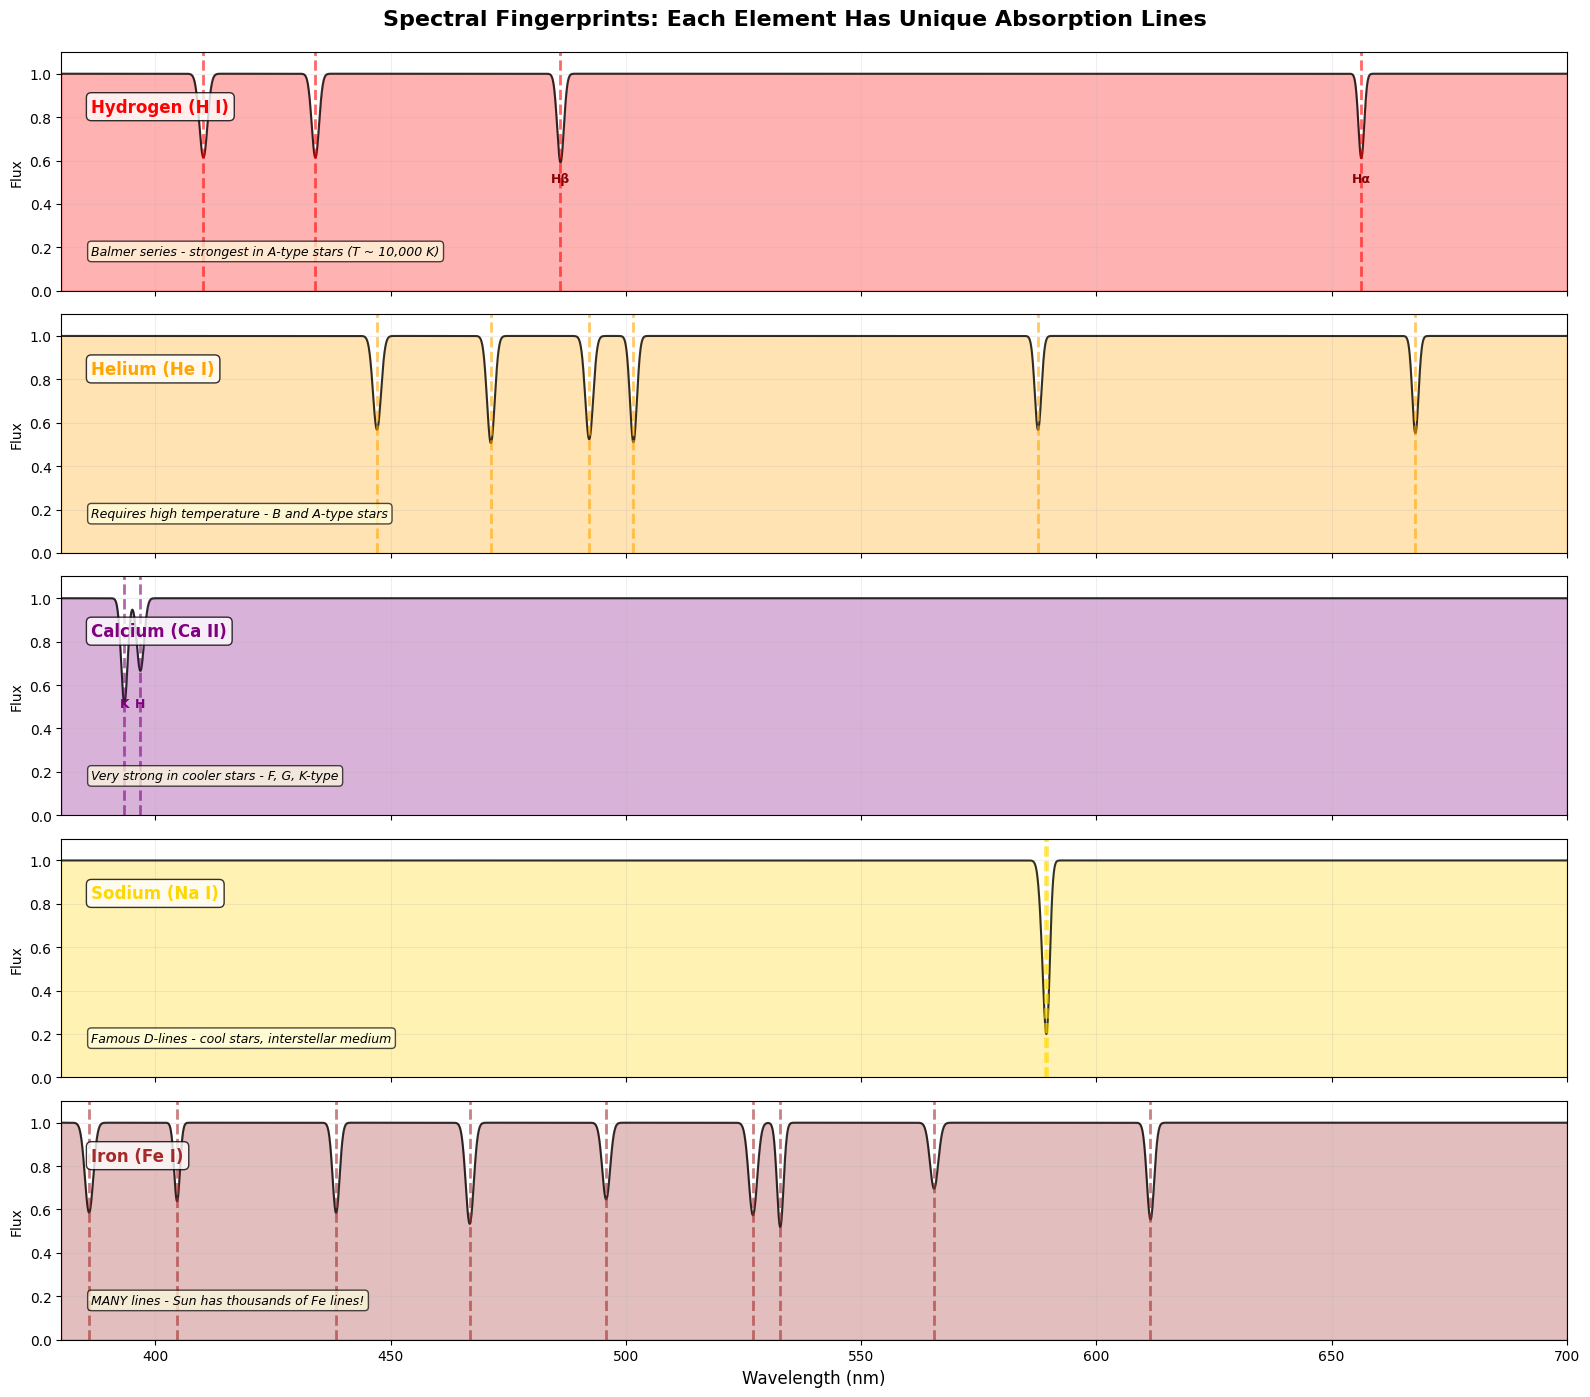


🔬 Spectral Analysis:

• By comparing stellar spectra with laboratory spectra,
  astronomers can identify which elements are present

• The STRENGTH of lines reveals:
  - Abundance of the element
  - Temperature (affects ionization)
  - Pressure (affects line width)

• The WAVELENGTH SHIFT reveals:
  - Radial velocity (Doppler effect)
  - Gravitational redshift

🌟 This is how we know what stars are made of!


In [71]:
# Create a comparison of spectral fingerprints for different elements

fig, axes = plt.subplots(5, 1, figsize=(16, 14), sharex=True)

wavelengths_elem = np.linspace(380, 700, 5000)

# Define spectral lines for different elements
element_lines = {
    'Hydrogen (H I)': {
        'lines': [410.2, 434.0, 486.1, 656.3],
        'color': 'red',
        'comment': 'Balmer series - strongest in A-type stars (T ~ 10,000 K)'
    },
    'Helium (He I)': {
        'lines': [447.1, 471.3, 492.2, 501.6, 587.6, 667.8],
        'color': 'orange',
        'comment': 'Requires high temperature - B and A-type stars'
    },
    'Calcium (Ca II)': {
        'lines': [393.4, 396.8],  # K and H lines
        'color': 'purple',
        'comment': 'Very strong in cooler stars - F, G, K-type'
    },
    'Sodium (Na I)': {
        'lines': [589.0, 589.6],  # D doublet (close together)
        'color': 'gold',
        'comment': 'Famous D-lines - cool stars, interstellar medium'
    },
    'Iron (Fe I)': {
        'lines': [385.9, 404.6, 438.4, 466.8, 495.8, 527.0, 532.8, 565.5, 611.5],
        'color': 'brown',
        'comment': 'MANY lines - Sun has thousands of Fe lines!'
    },
}

# Plot each element's spectrum
for idx, (element_name, data) in enumerate(element_lines.items()):
    ax = axes[idx]
    
    # Create a continuum
    continuum = np.ones_like(wavelengths_elem)
    
    # Add absorption lines
    spectrum = continuum.copy()
    for line_wave in data['lines']:
        if 380 < line_wave < 700:
            depth = 0.3 + 0.2 * np.random.random()
            width = 0.6 + 0.3 * np.random.random()
            spectrum -= depth * np.exp(-0.5 * ((wavelengths_elem - line_wave) / width)**2)
    
    # Plot
    ax.plot(wavelengths_elem, spectrum, 'k-', linewidth=1.5, alpha=0.8)
    ax.fill_between(wavelengths_elem, 0, spectrum, alpha=0.3, color=data['color'])
    
    # Mark the lines
    for line_wave in data['lines']:
        if 380 < line_wave < 700:
            ax.axvline(line_wave, color=data['color'], linestyle='--', 
                      linewidth=2, alpha=0.6)
            # Label the strongest lines
            if element_name == 'Hydrogen (H I)' and line_wave in [486.1, 656.3]:
                label = 'Hβ' if line_wave == 486.1 else 'Hα'
                ax.text(line_wave, 0.5, label, rotation=0, fontsize=9, 
                       ha='center', color='darkred', fontweight='bold')
            elif element_name == 'Calcium (Ca II)':
                label = 'K' if line_wave == 393.4 else 'H'
                ax.text(line_wave, 0.5, label, rotation=0, fontsize=9,
                       ha='center', color='purple', fontweight='bold')
    
    # Labels and formatting
    ax.set_ylabel('Flux', fontsize=10)
    ax.set_ylim(0, 1.1)
    ax.grid(True, alpha=0.2)
    
    # Element name and comment
    ax.text(0.02, 0.75, element_name, transform=ax.transAxes, fontsize=12,
           fontweight='bold', color=data['color'],
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    ax.text(0.02, 0.15, data['comment'], transform=ax.transAxes, fontsize=9,
           style='italic', color='black',
           bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))

axes[-1].set_xlabel('Wavelength (nm)', fontsize=12)
axes[-1].set_xlim(380, 700)

plt.suptitle('Spectral Fingerprints: Each Element Has Unique Absorption Lines', 
            fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n🔬 Spectral Analysis:")
print("\n• By comparing stellar spectra with laboratory spectra,")
print("  astronomers can identify which elements are present")
print("\n• The STRENGTH of lines reveals:")
print("  - Abundance of the element")
print("  - Temperature (affects ionization)")
print("  - Pressure (affects line width)")
print("\n• The WAVELENGTH SHIFT reveals:")
print("  - Radial velocity (Doppler effect)")
print("  - Gravitational redshift")
print("\n🌟 This is how we know what stars are made of!")

## 11. Summary: From Light to Chemistry

We've journeyed from basic blackbody radiation to understanding how spectra reveal the chemical composition of stars!

### What We've Learned:

1. ✅ **Blackbody Radiation** - Stars emit like hot dense objects following Planck's law
2. ✅ **Wien's Law** - Peak wavelength reveals temperature
3. ✅ **Photometry** - Color indices give rough temperature estimates
4. ✅ **Kirchhoff's Laws** - The foundation: continuous, emission, and absorption spectra
5. ✅ **Emission vs Absorption** - Hot thin gas emits, cool thin gas absorbs
6. ✅ **Element Identification** - Each element has unique spectral fingerprints
7. ✅ **Historical Discoveries** - Helium found in Sun first; "nebulium" was excited oxygen

### The Power of Spectroscopy:

From a single spectrum, we can determine:
- 🌡️ **Temperature** (from continuum shape and line ratios)
- 🧪 **Chemical Composition** (from line identification)
- 🌊 **Pressure** (from line widths)
- 🌀 **Rotation** (from line broadening)
- 🚀 **Velocity** (from Doppler shifts)
- 🧲 **Magnetic Fields** (from Zeeman splitting)
- 📏 **Distance** (from spectroscopic parallax)

### Next Steps:

In future notebooks, we'll explore:
- **Quantum Mechanics** - Why atoms absorb/emit specific wavelengths
- **Saha & Boltzmann Equations** - Temperature and ionization/excitation
- **Abundance Analysis** - Measuring element ratios quantitatively
- **Real Stellar Spectra** - Working with data from surveys
- **Exoplanet Detection** - Using radial velocity method

---

## 🌌 "We are all made of star stuff" - Carl Sagan

And spectroscopy is how we know this! Every atom in our bodies was forged in stellar interiors, and we can read that history in the light from the stars.

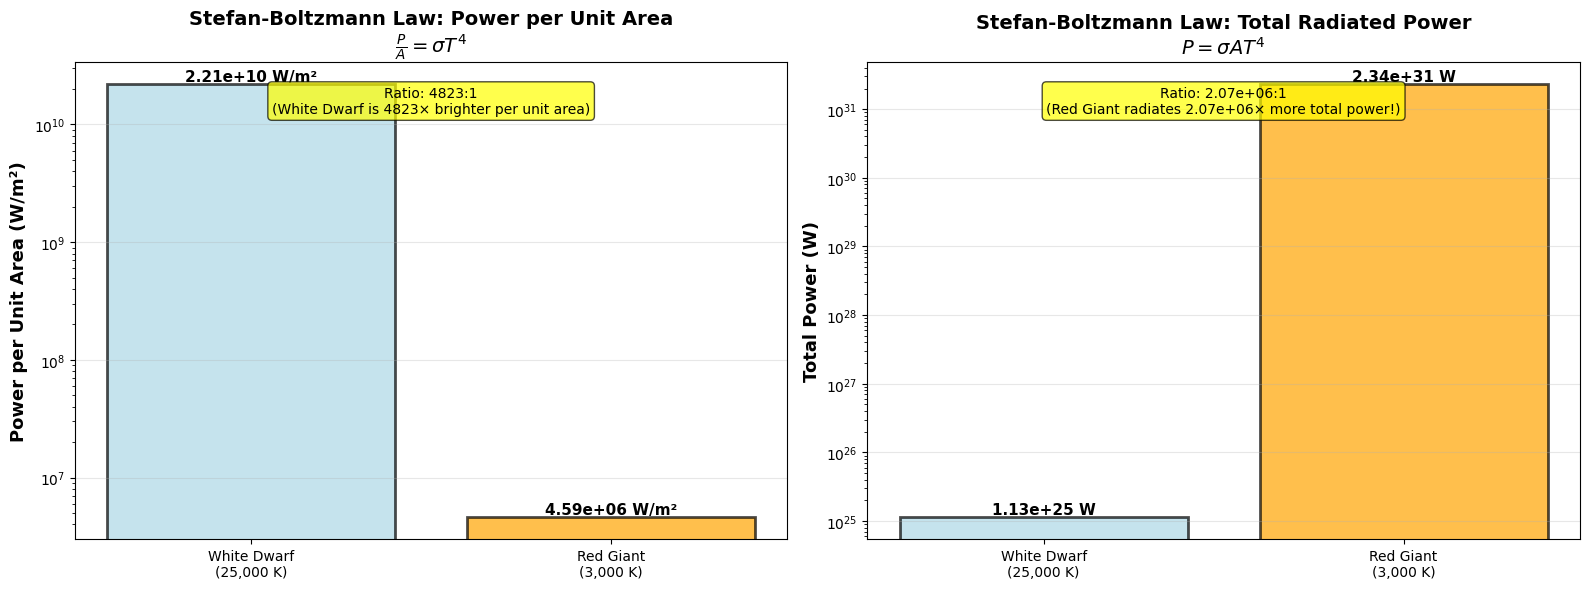


STEFAN-BOLTZMANN LAW DEMONSTRATION

White Dwarf (T = 25,000 K, R ≈ Earth radius):
  Power per unit area: 2.21e+10 W/m²
  Total power:         1.13e+25 W

Red Giant (T = 3,000 K, R ≈ 100,000 × White Dwarf):
  Power per unit area: 4.59e+06 W/m²
  Total power:         2.34e+31 W

📊 Key Insights:
• White dwarf is 4823× brighter per unit area (T⁴ effect!)
• BUT Red giant radiates 2.07e+06× more TOTAL power
• Why? ENORMOUS surface area (radius is 100,000× larger!)

💡 Stefan's Law: P ∝ T⁴ shows why temperature matters so much!
   Doubling temperature → 16× more power per unit area!


In [72]:
# Demonstrate Stefan-Boltzmann Law with stellar examples

# Constants
sigma_sb_value = 5.67e-8  # W/(m^2 K^4)
R_earth = 6.371e6  # Earth radius in meters (for white dwarf)

# White Dwarf parameters
T_wd = 25000  # K
R_wd = R_earth  # Approximately Earth-sized
A_wd = 4 * np.pi * R_wd**2

# Red Giant parameters
T_rg = 3000  # K
R_rg = 100000 * R_wd  # 100,000 times larger
A_rg = 4 * np.pi * R_rg**2

# Calculate power per unit area
P_per_A_wd = sigma_sb_value * T_wd**4
P_per_A_rg = sigma_sb_value * T_rg**4

# Calculate total power
P_total_wd = P_per_A_wd * A_wd
P_total_rg = P_per_A_rg * A_rg

# Create comparison visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# LEFT PANEL: Power per unit area comparison
stars = ['White Dwarf\n(25,000 K)', 'Red Giant\n(3,000 K)']
power_per_area = [P_per_A_wd, P_per_A_rg]
colors_stars = ['lightblue', 'orange']

bars1 = ax1.bar(stars, power_per_area, color=colors_stars, alpha=0.7, edgecolor='black', linewidth=2)
ax1.set_ylabel('Power per Unit Area (W/m²)', fontsize=13, fontweight='bold')
ax1.set_title('Stefan-Boltzmann Law: Power per Unit Area\n' + r'$\frac{P}{A} = \sigma T^4$', 
              fontsize=14, fontweight='bold')
ax1.set_yscale('log')
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, value in zip(bars1, power_per_area):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{value:.2e} W/m²',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Calculate and show ratio
ratio_per_area = P_per_A_wd / P_per_A_rg
ax1.text(0.5, 0.95, f'Ratio: {ratio_per_area:.0f}:1\n(White Dwarf is {ratio_per_area:.0f}× brighter per unit area)',
         transform=ax1.transAxes, ha='center', va='top', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# RIGHT PANEL: Total power comparison
power_total = [P_total_wd, P_total_rg]

bars2 = ax2.bar(stars, power_total, color=colors_stars, alpha=0.7, edgecolor='black', linewidth=2)
ax2.set_ylabel('Total Power (W)', fontsize=13, fontweight='bold')
ax2.set_title('Stefan-Boltzmann Law: Total Radiated Power\n' + r'$P = \sigma A T^4$', 
              fontsize=14, fontweight='bold')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, value in zip(bars2, power_total):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{value:.2e} W',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Calculate and show ratio
ratio_total = P_total_rg / P_total_wd
ax2.text(0.5, 0.95, f'Ratio: {ratio_total:.2e}:1\n(Red Giant radiates {ratio_total:.2e}× more total power!)',
         transform=ax2.transAxes, ha='center', va='top', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("STEFAN-BOLTZMANN LAW DEMONSTRATION")
print("="*70)
print(f"\nWhite Dwarf (T = {T_wd:,} K, R ≈ Earth radius):")
print(f"  Power per unit area: {P_per_A_wd:.2e} W/m²")
print(f"  Total power:         {P_total_wd:.2e} W")
print(f"\nRed Giant (T = {T_rg:,} K, R ≈ 100,000 × White Dwarf):")
print(f"  Power per unit area: {P_per_A_rg:.2e} W/m²")
print(f"  Total power:         {P_total_rg:.2e} W")
print(f"\n📊 Key Insights:")
print(f"• White dwarf is {ratio_per_area:.0f}× brighter per unit area (T⁴ effect!)")
print(f"• BUT Red giant radiates {ratio_total:.2e}× more TOTAL power")
print(f"• Why? ENORMOUS surface area (radius is 100,000× larger!)")
print(f"\n💡 Stefan's Law: P ∝ T⁴ shows why temperature matters so much!")
print(f"   Doubling temperature → 16× more power per unit area!")

## 12. The Classical Physics Problem: The Ultraviolet Catastrophe

### The Challenge

By the late 19th century, scientists had measured blackbody radiation curves experimentally, but **classical physics could not explain them**.

### The Rayleigh-Jeans Law (Classical Approach)

Lord Rayleigh and Sir James Jeans developed a classical model treating electromagnetic waves in a cavity as continuous oscillators that could exchange any amount of energy with the cavity walls.

**Result**: The **Rayleigh-Jeans law** predicted:
- Correct behavior at long wavelengths (infrared, radio)
- **INFINITE intensity** at short wavelengths (ultraviolet)

### The Ultraviolet Catastrophe

This divergence between classical theory and experiment was called the **ultraviolet catastrophe**:

$$I_{classical}(\lambda) \rightarrow \infty \text{ as } \lambda \rightarrow 0$$

**The problem**: Classical physics predicted that all blackbodies should emit infinite energy at short wavelengths!

**Reality**: Experimental measurements showed blackbody intensity has finite values and peaks at a specific wavelength.

This failure showed that **classical physics was fundamentally incomplete** at the atomic scale.

### The Solution: Max Planck (1900)

Max Planck solved this problem by introducing a revolutionary idea: **Energy Quantization**

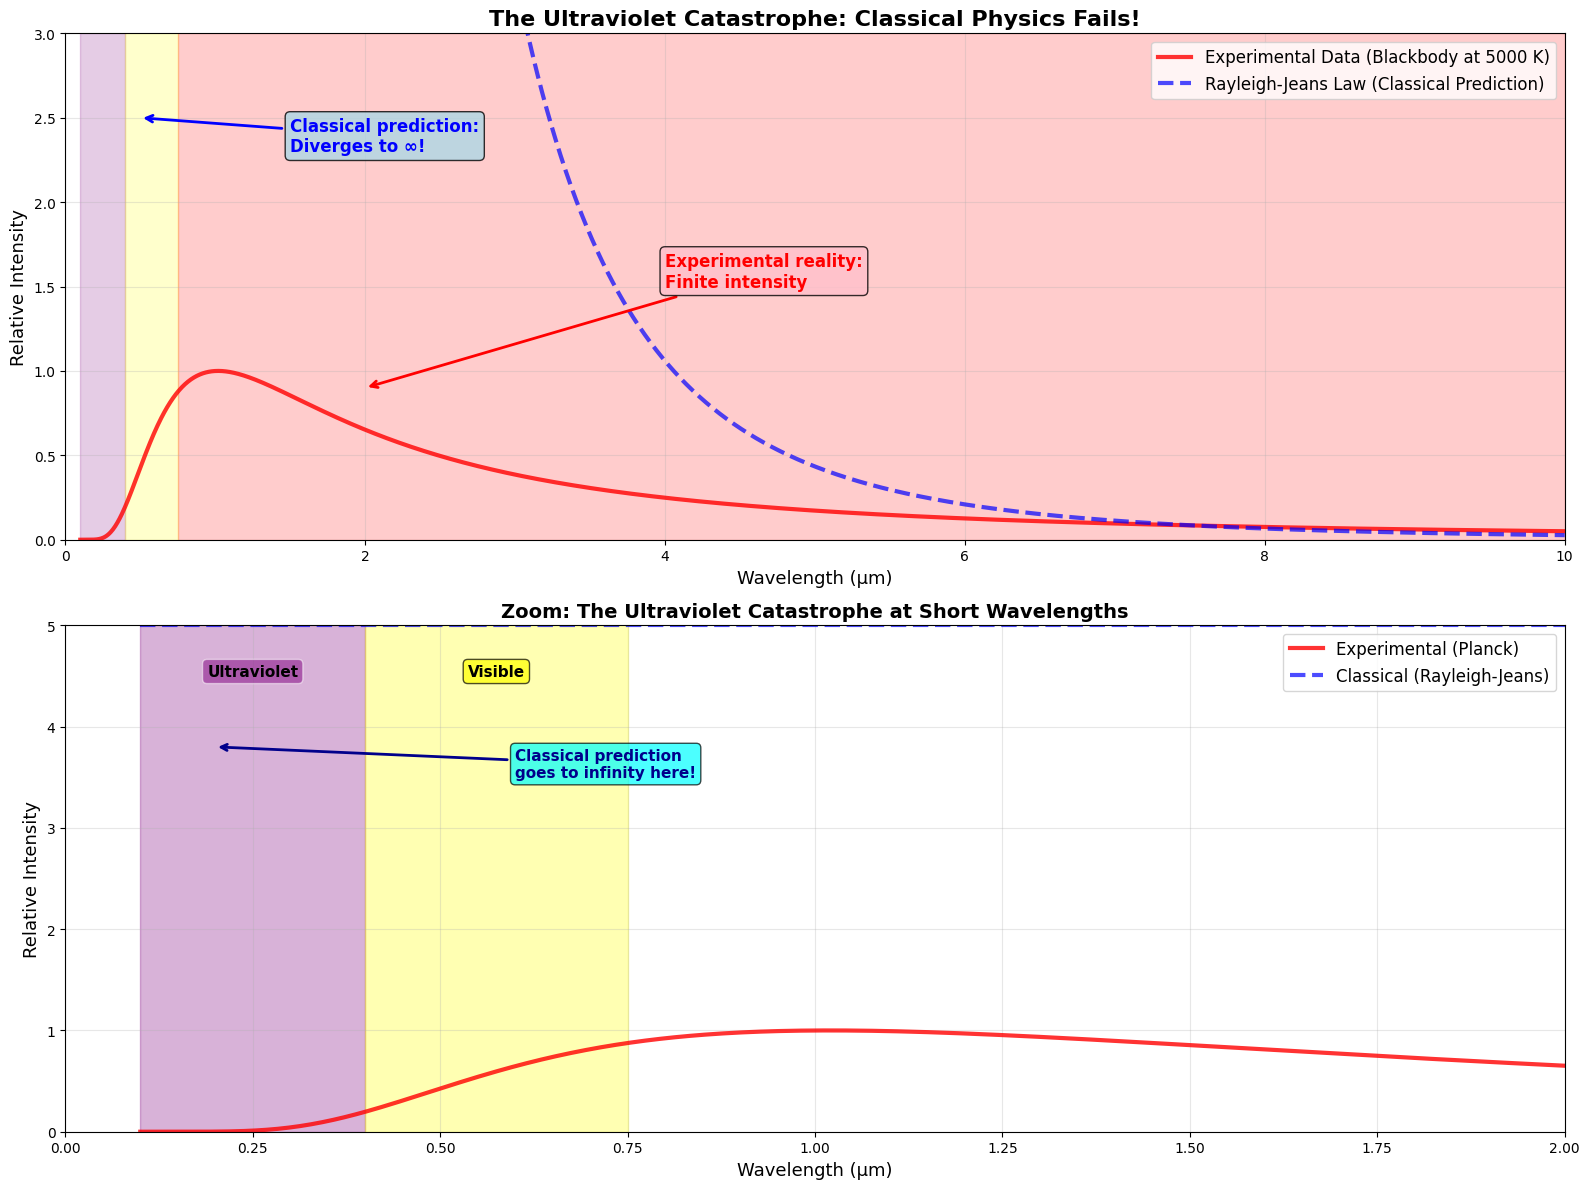


THE ULTRAVIOLET CATASTROPHE

🚨 Classical Physics Failure:
• Rayleigh-Jeans Law: I(λ) ∝ 1/λ⁴
• Predicts INFINITE intensity as wavelength → 0
• Works well for long wavelengths (infrared)
• FAILS catastrophically for short wavelengths (UV)

✅ Experimental Reality:
• Intensity has a finite peak
• Intensity decreases at both long AND short wavelengths
• Cannot be explained by classical continuous energy exchange

💡 The Solution (Planck, 1900):
• Energy must be QUANTIZED
• Oscillators can only exchange discrete amounts of energy
• This revolutionary idea founded quantum mechanics!

🌟 This was one of the most important problems in physics history!


In [73]:
# Visualize the Ultraviolet Catastrophe

# Create wavelength array (in micrometers for better visualization)
wavelengths_uv = np.linspace(0.1, 10, 2000)  # micrometers

# Simulate experimental blackbody data (using Planck's law)
T_demo = 5000  # K
bb_demo = BlackBody(temperature=T_demo * u.K)
experimental_data = bb_demo(wavelengths_uv * u.um)
experimental_data = experimental_data / experimental_data.max()

# Simulate Rayleigh-Jeans law (classical prediction)
# Rayleigh-Jeans: I(λ) ∝ 1/λ⁴
# This diverges at short wavelengths!
rayleigh_jeans = 1 / (wavelengths_uv**4)
# Normalize to match experimental data at long wavelengths
rayleigh_jeans = rayleigh_jeans / rayleigh_jeans[1500] * experimental_data.value[1500]

# Clip Rayleigh-Jeans for visualization (it goes to infinity!)
rayleigh_jeans = np.clip(rayleigh_jeans, 0, 5)

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# TOP PANEL: Full comparison
ax1.plot(wavelengths_uv, experimental_data.value, 'r-', linewidth=3, 
         label='Experimental Data (Blackbody at 5000 K)', alpha=0.8)
ax1.plot(wavelengths_uv, rayleigh_jeans, 'b--', linewidth=3, 
         label='Rayleigh-Jeans Law (Classical Prediction)', alpha=0.7)

ax1.set_xlabel('Wavelength (μm)', fontsize=13)
ax1.set_ylabel('Relative Intensity', fontsize=13)
ax1.set_title('The Ultraviolet Catastrophe: Classical Physics Fails!', 
              fontsize=16, fontweight='bold')
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 3)
ax1.legend(fontsize=12, loc='upper right')
ax1.grid(True, alpha=0.3)

# Annotate regions
ax1.axvspan(0.1, 0.4, alpha=0.2, color='purple', label='UV Region')
ax1.axvspan(0.4, 0.75, alpha=0.2, color='yellow', label='Visible')
ax1.axvspan(0.75, 10, alpha=0.2, color='red', label='Infrared')

ax1.annotate('Classical prediction:\nDiverges to ∞!', 
             xy=(0.5, 2.5), xytext=(1.5, 2.3),
             fontsize=12, color='blue', fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8),
             arrowprops=dict(arrowstyle='->', color='blue', lw=2))

ax1.annotate('Experimental reality:\nFinite intensity', 
             xy=(2, 0.9), xytext=(4, 1.5),
             fontsize=12, color='red', fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='pink', alpha=0.8),
             arrowprops=dict(arrowstyle='->', color='red', lw=2))

# BOTTOM PANEL: Zoom into UV region to show the catastrophe
ax2.plot(wavelengths_uv, experimental_data.value, 'r-', linewidth=3, 
         label='Experimental (Planck)', alpha=0.8)
ax2.plot(wavelengths_uv, rayleigh_jeans, 'b--', linewidth=3, 
         label='Classical (Rayleigh-Jeans)', alpha=0.7)

ax2.set_xlabel('Wavelength (μm)', fontsize=13)
ax2.set_ylabel('Relative Intensity', fontsize=13)
ax2.set_title('Zoom: The Ultraviolet Catastrophe at Short Wavelengths', 
              fontsize=14, fontweight='bold')
ax2.set_xlim(0, 2)
ax2.set_ylim(0, 5)
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.3)

# Mark UV region
ax2.axvspan(0.1, 0.4, alpha=0.3, color='purple')
ax2.text(0.25, 4.5, 'Ultraviolet', ha='center', fontsize=11, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='purple', alpha=0.5, edgecolor='white'))

# Mark visible region
ax2.axvspan(0.4, 0.75, alpha=0.3, color='yellow')
ax2.text(0.575, 4.5, 'Visible', ha='center', fontsize=11, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

ax2.annotate('Classical prediction\ngoes to infinity here!', 
             xy=(0.2, 3.8), xytext=(0.6, 3.5),
             fontsize=11, color='darkblue', fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='cyan', alpha=0.7),
             arrowprops=dict(arrowstyle='->', color='darkblue', lw=2))

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("THE ULTRAVIOLET CATASTROPHE")
print("="*70)
print("\n🚨 Classical Physics Failure:")
print("• Rayleigh-Jeans Law: I(λ) ∝ 1/λ⁴")
print("• Predicts INFINITE intensity as wavelength → 0")
print("• Works well for long wavelengths (infrared)")
print("• FAILS catastrophically for short wavelengths (UV)")
print("\n✅ Experimental Reality:")
print("• Intensity has a finite peak")
print("• Intensity decreases at both long AND short wavelengths")
print("• Cannot be explained by classical continuous energy exchange")
print("\n💡 The Solution (Planck, 1900):")
print("• Energy must be QUANTIZED")
print("• Oscillators can only exchange discrete amounts of energy")
print("• This revolutionary idea founded quantum mechanics!")
print("\n🌟 This was one of the most important problems in physics history!")

## 13. Planck's Revolutionary Solution: Quantized Energy

### Planck's Hypothesis (1900)

Max Planck proposed a radical new idea: **Energy is quantized** - it comes in discrete packets called **quanta**.

### The Quantum Hypothesis

Planck assumed that oscillators in the cavity walls can only have **discrete energy values**:

$$E_n = nhf$$

where:
- $n$ = 0, 1, 2, 3, ... (quantum number)
- $h = 6.626 \times 10^{-34}$ J·s (Planck's constant)
- $f$ = frequency of oscillation (Hz)

### Energy Quanta

The smallest "packet" of energy that can be exchanged is:

$$\Delta E = hf = \frac{hc}{\lambda}$$

This is called a **quantum of energy** or **photon**.

**Key Points**:
1. Energy can only be emitted or absorbed in integer multiples of $hf$
2. Quantum states: {0, hf, 2hf, 3hf, ..., nhf, ...}
3. Energy jumps between states: $\Delta E = hf$
4. An oscillator cannot exchange energy continuously - only in these discrete steps!

### Planck's Blackbody Radiation Law

When energy quantization is included, the intensity of blackbody radiation is:

$$I(\lambda, T) = \frac{2hc^2}{\lambda^5} \frac{1}{e^{hc/\lambda k_B T} - 1}$$

where:
- $c$ = speed of light = $3.0 \times 10^8$ m/s
- $k_B$ = Boltzmann constant = $1.38 \times 10^{-23}$ J/K

This formula:
- ✅ Perfectly matches experimental data
- ✅ Avoids the ultraviolet catastrophe
- ✅ Reduces to Wien's law and Stefan's law
- ✅ Reduces to Rayleigh-Jeans at long wavelengths

### The Birth of Quantum Mechanics

Initially, Planck thought quantization was just a "mathematical trick." But Einstein's 1905 explanation of the photoelectric effect proved that **energy quanta (photons) are real**!

This marked the beginning of **quantum mechanics** - one of the most successful theories in physics.

PLANCK'S QUANTUM OSCILLATOR

Oscillator frequency:  f = 5.00e+14 Hz
Corresponding wavelength: λ = 599.6 nm (orange light)

Planck's constant: h = 6.62607015e-34 J s

Energy quantum: ΔE = hf = 2.068 eV
                        = 3.313e-19 Hz J s

----------------------------------------------------------------------
QUANTIZED ENERGY LEVELS
----------------------------------------------------------------------

Quantum Number (n)  |  Energy (E_n = nhf)  |  Energy (eV)
----------------------------------------------------------------------
        0           |  0.000e+00 Hz J s  |    0.000 eV
        1           |  3.313e-19 Hz J s  |    2.068 eV
        2           |  6.626e-19 Hz J s  |    4.136 eV
        3           |  9.939e-19 Hz J s  |    6.204 eV
        4           |  1.325e-18 Hz J s  |    8.271 eV
        5           |  1.657e-18 Hz J s  |   10.339 eV
        6           |  1.988e-18 Hz J s  |   12.407 eV
        7           |  2.319e-18 Hz J s  |   14.475 eV
        8          

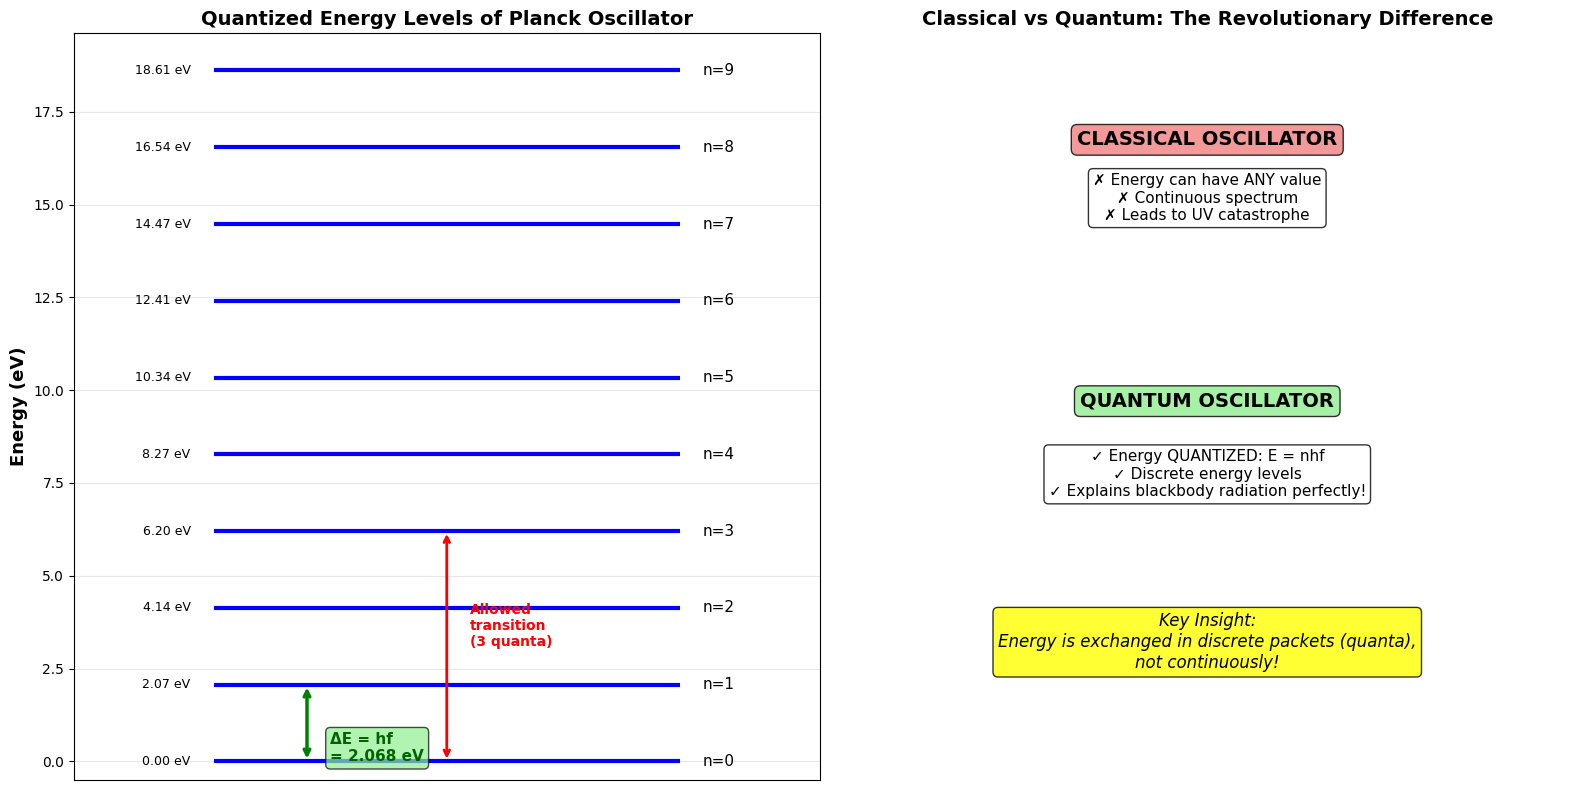


KEY INSIGHTS

🔬 Energy Quantization:
• Energy comes in discrete packets of ΔE = hf = 2.068 eV
• An oscillator can be in state n=0, 1, 2, 3, ... but NOT n=1.5 or n=2.7!
• Energy transitions occur in jumps, not smoothly

⚛️ Why This Matters:
• Solves the ultraviolet catastrophe
• Explains atomic spectra (discrete spectral lines!)
• Foundation of quantum mechanics
• Revolutionized our understanding of nature

💡 Planck's constant h sets the scale of quantum effects
   For macroscopic objects, h is so tiny that quantum effects are invisible


In [74]:
# Demonstrate Planck's Quantized Energy Levels

from astropy.constants import h as h_planck, c as c_light, k_B as k_boltzmann

# Example: A quantum oscillator vibrating at visible light frequency
frequency_vis = 5.0e14  # Hz (corresponds to ~600 nm, orange light)
wavelength_vis = (c_light / (frequency_vis * u.Hz)).to(u.nm)

# Calculate energy quantum
E_quantum = h_planck * frequency_vis * u.Hz

print("="*70)
print("PLANCK'S QUANTUM OSCILLATOR")
print("="*70)
print(f"\nOscillator frequency:  f = {frequency_vis:.2e} Hz")
print(f"Corresponding wavelength: λ = {wavelength_vis.value:.1f} nm (orange light)")
print(f"\nPlanck's constant: h = {h_planck}")
print(f"\nEnergy quantum: ΔE = hf = {E_quantum.to(u.eV):.3f}")
print(f"                        = {E_quantum:.3e}")

# Show quantized energy levels
print("\n" + "-"*70)
print("QUANTIZED ENERGY LEVELS")
print("-"*70)
print("\nQuantum Number (n)  |  Energy (E_n = nhf)  |  Energy (eV)")
print("-"*70)
for n in range(0, 11):
    E_n = n * E_quantum
    E_n_eV = E_n.to(u.eV)
    print(f"       {n:2d}           |  {E_n:.3e}  |  {E_n_eV.value:7.3f} eV")

# Visualize energy levels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# LEFT PANEL: Energy level diagram
n_levels = 10
energies = np.array([n * E_quantum.to(u.eV).value for n in range(n_levels)])

for n, energy in enumerate(energies):
    ax1.hlines(energy, 0, 1, colors='blue', linewidth=3)
    ax1.text(1.05, energy, f'n={n}', fontsize=11, va='center')
    ax1.text(-0.05, energy, f'{energy:.2f} eV', fontsize=9, va='center', ha='right')

# Show allowed transitions
ax1.annotate('', xy=(0.5, energies[3]), xytext=(0.5, energies[0]),
            arrowprops=dict(arrowstyle='<->', color='red', lw=2))
ax1.text(0.55, (energies[0] + energies[3])/2, 'Allowed\ntransition\n(3 quanta)', 
         fontsize=10, color='red', fontweight='bold')

# Mark the quantum spacing
ax1.annotate('', xy=(0.2, energies[1]), xytext=(0.2, energies[0]),
            arrowprops=dict(arrowstyle='<->', color='green', lw=2.5))
ax1.text(0.25, energies[0]/2, f'ΔE = hf\n= {E_quantum.to(u.eV).value:.3f} eV', 
         fontsize=11, color='darkgreen', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

ax1.set_xlim(-0.3, 1.3)
ax1.set_ylim(-0.5, energies[-1] + 1)
ax1.set_ylabel('Energy (eV)', fontsize=13, fontweight='bold')
ax1.set_title('Quantized Energy Levels of Planck Oscillator', fontsize=14, fontweight='bold')
ax1.set_xticks([])
ax1.grid(True, alpha=0.3, axis='y')

# RIGHT PANEL: Classical vs Quantum comparison
ax2.text(0.5, 0.85, 'CLASSICAL OSCILLATOR', ha='center', fontsize=14, 
         fontweight='bold', transform=ax2.transAxes,
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))
ax2.text(0.5, 0.75, '✗ Energy can have ANY value\n✗ Continuous spectrum\n✗ Leads to UV catastrophe',
         ha='center', fontsize=11, transform=ax2.transAxes,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax2.text(0.5, 0.5, 'QUANTUM OSCILLATOR', ha='center', fontsize=14,
         fontweight='bold', transform=ax2.transAxes,
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
ax2.text(0.5, 0.38, '✓ Energy QUANTIZED: E = nhf\n✓ Discrete energy levels\n✓ Explains blackbody radiation perfectly!',
         ha='center', fontsize=11, transform=ax2.transAxes,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax2.text(0.5, 0.15, 'Key Insight:\nEnergy is exchanged in discrete packets (quanta),\nnot continuously!',
         ha='center', fontsize=12, style='italic', transform=ax2.transAxes,
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.axis('off')
ax2.set_title('Classical vs Quantum: The Revolutionary Difference', 
              fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("KEY INSIGHTS")
print("="*70)
print("\n🔬 Energy Quantization:")
print(f"• Energy comes in discrete packets of ΔE = hf = {E_quantum.to(u.eV).value:.3f} eV")
print("• An oscillator can be in state n=0, 1, 2, 3, ... but NOT n=1.5 or n=2.7!")
print("• Energy transitions occur in jumps, not smoothly")
print("\n⚛️ Why This Matters:")
print("• Solves the ultraviolet catastrophe")
print("• Explains atomic spectra (discrete spectral lines!)")
print("• Foundation of quantum mechanics")
print("• Revolutionized our understanding of nature")
print("\n💡 Planck's constant h sets the scale of quantum effects")
print("   For macroscopic objects, h is so tiny that quantum effects are invisible")

## 14. Quantum vs Macroscopic: When Does Quantization Matter?

### Example: Classical Oscillator

Consider a 1.0 kg mass on a spring with spring constant k = 1000 N/m, oscillating with amplitude A = 0.10 m.

**Classical frequency**:
$$f = \frac{1}{2\pi}\sqrt{\frac{k}{m}} = \frac{1}{2\pi}\sqrt{\frac{1000}{1.0}} \approx 5.0 \text{ Hz}$$

**Energy quantum**:
$$\Delta E = hf = (6.626 \times 10^{-34})(5.0) \approx 3.3 \times 10^{-33} \text{ J}$$

**Classical energy**:
$$E_{classical} = \frac{1}{2}kA^2 = \frac{1}{2}(1000)(0.10)^2 = 5.0 \text{ J}$$

**Ratio**:
$$\frac{\Delta E}{E_{classical}} = \frac{3.3 \times 10^{-33}}{5.0} \approx 10^{-33}$$

### The Answer

The quantum energy spacing is **33 orders of magnitude smaller** than the classical energy!

For macroscopic systems:
- Energy appears continuous
- Quantum effects are completely negligible  
- Classical physics works perfectly

For atomic systems:
- Energy quantization is significant
- Discrete energy levels observable
- Quantum mechanics is essential

### When Quantum Mechanics Matters

| System | Energy Scale | Quantum Effects? |
|--------|-------------|------------------|
| **Oscillating mass** | Joules | ❌ No - appears continuous |
| **Molecular vibrations** | ~0.1 eV | ✓ Yes - discrete levels |
| **Atomic electrons** | ~eV to keV | ✓✓ Yes - very important |
| **Nuclear states** | ~MeV | ✓✓✓ Yes - absolutely critical |

**Bottom line**: Planck's constant h is so small that quantum effects only become noticeable at atomic and subatomic scales!

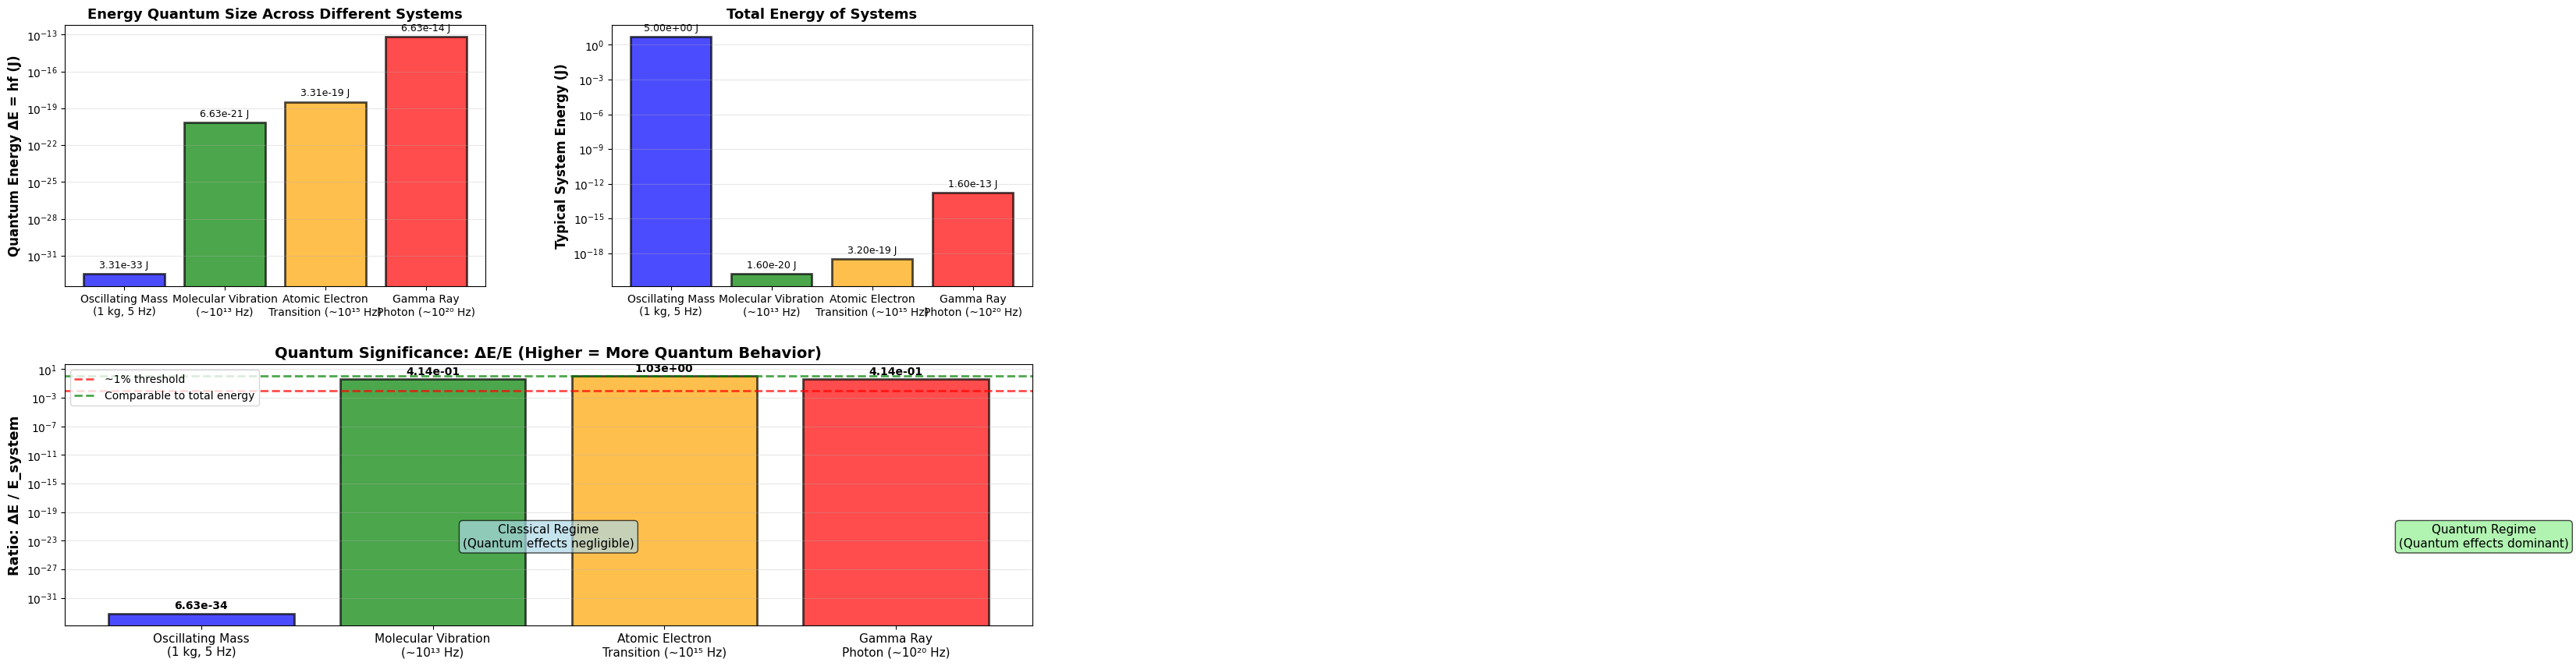


QUANTUM SIGNIFICANCE ACROSS DIFFERENT SYSTEMS

Oscillating Mass (1 kg, 5 Hz):
  Frequency:           f = 5.00e+00 Hz
  Energy quantum:     ΔE = 3.31e-33 J
  System energy:       E = 5.00e+00 J
  Ratio (ΔE/E):           6.63e-34
  → Classical physics works perfectly! ✓

Molecular Vibration (~10¹³ Hz):
  Frequency:           f = 1.00e+13 Hz
  Energy quantum:     ΔE = 6.63e-21 J
  System energy:       E = 1.60e-20 J
  Ratio (ΔE/E):           4.14e-01
  → Quantum effects important! ⚛️

Atomic Electron Transition (~10¹⁵ Hz):
  Frequency:           f = 5.00e+14 Hz
  Energy quantum:     ΔE = 3.31e-19 J
  System energy:       E = 3.20e-19 J
  Ratio (ΔE/E):           1.03e+00
  → Fully quantum mechanical! ⚛️⚛️⚛️

Gamma Ray Photon (~10²⁰ Hz):
  Frequency:           f = 1.00e+20 Hz
  Energy quantum:     ΔE = 6.63e-14 J
  System energy:       E = 1.60e-13 J
  Ratio (ΔE/E):           4.14e-01
  → Quantum effects important! ⚛️

SUMMARY

💡 Key Insight:
   Planck's constant h = 6.626×10⁻³⁴ J·s is EXT

In [75]:
# Compare quantum effects at different scales

systems = {
    'Oscillating Mass\n(1 kg, 5 Hz)': {
        'frequency': 5.0,
        'energy_classical': 5.0,
        'scale': 'Macroscopic'
    },
    'Molecular Vibration\n(~10¹³ Hz)': {
        'frequency': 1e13,
        'energy_classical': 0.1 * 1.602e-19,  # 0.1 eV in Joules
        'scale': 'Molecular'
    },
    'Atomic Electron\nTransition (~10¹⁵ Hz)': {
        'frequency': 5e14,
        'energy_classical': 2.0 * 1.602e-19,  # 2 eV in Joules
        'scale': 'Atomic'
    },
    'Gamma Ray\nPhoton (~10²⁰ Hz)': {
        'frequency': 1e20,
        'energy_classical': 1e6 * 1.602e-19,  # 1 MeV in Joules
        'scale': 'Nuclear'
    }
}

# Calculate quantum energy and ratios
h_value = 6.626e-34
quantum_energies = []
classical_energies = []
ratios = []
labels = []

for name, data in systems.items():
    E_quantum = h_value * data['frequency']
    E_classical = data['energy_classical']
    ratio = E_quantum / E_classical
    
    quantum_energies.append(E_quantum)
    classical_energies.append(E_classical)
    ratios.append(ratio)
    labels.append(name)

# Create visualization
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# Panel 1: Quantum energy comparison
ax1 = fig.add_subplot(gs[0, 0])
colors_scale = ['blue', 'green', 'orange', 'red']
bars1 = ax1.bar(range(len(labels)), quantum_energies, color=colors_scale, alpha=0.7, edgecolor='black', linewidth=2)
ax1.set_xticks(range(len(labels)))
ax1.set_xticklabels(labels, fontsize=10)
ax1.set_ylabel('Quantum Energy ΔE = hf (J)', fontsize=12, fontweight='bold')
ax1.set_title('Energy Quantum Size Across Different Systems', fontsize=13, fontweight='bold')
ax1.set_yscale('log')
ax1.grid(True, alpha=0.3, axis='y')

for i, (bar, energy) in enumerate(zip(bars1, quantum_energies)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height * 2,
            f'{energy:.2e} J',
            ha='center', va='bottom', fontsize=9, rotation=0)

# Panel 2: Classical energy comparison
ax2 = fig.add_subplot(gs[0, 1])
bars2 = ax2.bar(range(len(labels)), classical_energies, color=colors_scale, alpha=0.7, edgecolor='black', linewidth=2)
ax2.set_xticks(range(len(labels)))
ax2.set_xticklabels(labels, fontsize=10)
ax2.set_ylabel('Typical System Energy (J)', fontsize=12, fontweight='bold')
ax2.set_title('Total Energy of Systems', fontsize=13, fontweight='bold')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3, axis='y')

for i, (bar, energy) in enumerate(zip(bars2, classical_energies)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height * 2,
            f'{energy:.2e} J',
            ha='center', va='bottom', fontsize=9, rotation=0)

# Panel 3: Ratio comparison (quantum significance)
ax3 = fig.add_subplot(gs[1, :])
bars3 = ax3.bar(range(len(labels)), ratios, color=colors_scale, alpha=0.7, edgecolor='black', linewidth=2)
ax3.set_xticks(range(len(labels)))
ax3.set_xticklabels(labels, fontsize=11)
ax3.set_ylabel('Ratio: ΔE / E_system', fontsize=13, fontweight='bold')
ax3.set_title('Quantum Significance: ΔE/E (Higher = More Quantum Behavior)', 
              fontsize=14, fontweight='bold')
ax3.set_yscale('log')
ax3.grid(True, alpha=0.3, axis='y')

# Add threshold line
ax3.axhline(y=0.01, color='red', linestyle='--', linewidth=2, alpha=0.7, label='~1% threshold')
ax3.axhline(y=1.0, color='green', linestyle='--', linewidth=2, alpha=0.7, label='Comparable to total energy')

for i, (bar, ratio) in enumerate(zip(bars3, ratios)):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height * 2,
            f'{ratio:.2e}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add annotations
ax3.text(0.5, 0.3, 'Classical Regime\n(Quantum effects negligible)', 
         transform=ax3.transAxes, ha='center', fontsize=11,
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

ax3.text(2.5, 0.3, 'Quantum Regime\n(Quantum effects dominant)', 
         transform=ax3.transAxes, ha='center', fontsize=11,
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

ax3.legend(fontsize=10, loc='upper left')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("QUANTUM SIGNIFICANCE ACROSS DIFFERENT SYSTEMS")
print("="*70)

for i, name in enumerate(labels):
    clean_name = name.replace('\n', ' ')
    print(f"\n{clean_name}:")
    print(f"  Frequency:           f = {systems[list(systems.keys())[i]]['frequency']:.2e} Hz")
    print(f"  Energy quantum:     ΔE = {quantum_energies[i]:.2e} J")
    print(f"  System energy:       E = {classical_energies[i]:.2e} J")
    print(f"  Ratio (ΔE/E):           {ratios[i]:.2e}")
    
    if ratios[i] < 1e-10:
        print(f"  → Classical physics works perfectly! ✓")
    elif ratios[i] < 0.01:
        print(f"  → Small quantum corrections")
    elif ratios[i] < 1.0:
        print(f"  → Quantum effects important! ⚛️")
    else:
        print(f"  → Fully quantum mechanical! ⚛️⚛️⚛️")

print("\n" + "="*70)
print("SUMMARY")
print("="*70)
print("\n💡 Key Insight:")
print("   Planck's constant h = 6.626×10⁻³⁴ J·s is EXTREMELY small!")
print("\n📏 Scale Matters:")
print("   • Macroscopic: h is negligible → classical physics works")
print("   • Atomic/molecular: h is significant → quantum mechanics required")
print("\n🌟 For Stellar Spectroscopy:")
print("   • Individual photons: Quantum (E = hf)")
print("   • Overall blackbody radiation: Can use classical statistics")
print("   • Atomic transitions: Fully quantum mechanical!")